#### Harvard University Extension School
#### Wearable Devices and Computer Vision 
#### by Jose Luis Ramirez Herran 

#### Artin Bogdanov
#### Mariam Gogia

#### Summer 2020

# AirGesture
### Data collection, visualization, and cleaning. 
### Model development, training & testing. 

#####  Pandas and Numpy for data collection and manipulation. 
##### Matplotlib library for data visualization and pattern exploration. 
##### Skilearn library for Convolutional Neural Network model. 

In [92]:
# data structure and manipulation
import pandas as pd
import numpy as np 

# data visualization
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# files and time 
import csv
import sys
import time
import datetime as dt

In [93]:
# import data
file = 'swipe_right_27.csv'
df = pd.read_csv(file)
df_original = pd.read_csv(file)
df
# df.tail(50)

id         r   theta      phi  acc_x  acc_y  acc_z     abs_a     g_x  \
0      1   716.224  10.156 -100.954    -24   -124    705   716.224   52990   
1      2  1181.133   8.552 -172.146   -174    -24   1168  1181.133  -14280   
2      3   993.902   5.693  -53.246     59    -79    989   993.902   -3920   
3      4  1008.187   5.814 -108.257    -32    -97   1003  1008.187   -5040   
4      5  1309.119   3.260 -112.087    -28    -69   1307  1309.119    2450   
..   ...       ...     ...      ...    ...    ...    ...       ...     ...   
301  302   980.020  55.789 -150.588   -706   -398    551   980.020  -34160   
302  303  1074.998  61.192 -144.723   -769   -544    518  1074.998  -25200   
303  304  1099.422  95.061 -165.240  -1059   -279    -97  1099.422   18270   
304  305   902.027  55.339 -131.229   -489   -558    513   902.027   65590   
305  306  2157.655  81.658 -159.374  -1998   -752    313  2157.655 -169680   

       g_y  ...  delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
0    65520  ...      0.000            0            0            0   
1     1260  ...    -71.192         -150          100         1292   
2   -29820  ...    118.900          233          -55         1013   
3     7350  ...    -55.011          -91          -18         1082   
4     6790  ...     -3.830            4           28         1404   
..     ...  ...        ...          ...          ...          ...   
301  51170  ...     17.154          -34         -252          697   
302  28770  ...      5.865          -63         -146          916   
303 -74270  ...    -20.517         -290          265          447   
304   1120  ...     34.011          570         -279          792   
305 -58870  ...    -28.145        -1509         -194          871   

     delta_abs_acc  delta_g_x  delta_g_y  delta_g_z  delta_abs_g  label  
0            0.000          0          0          0            0      0  
1          464.909     -67270     -64260      35700       -25905      0  
2         -187.231      10360     -31080     -13440         3732      0  
3           14.285      -1120      37170      -8680       -22808      0  
4          300.932       7490       -560      -1330        -1914      0  
..             ...        ...        ...        ...          ...    ...  
301       -104.793       5880     -31430    -112420       -47676      0  
302         94.978       8960     -22400      10150        31333      0  
303         24.424      43470    -103040      -4200         2728      0  
304       -197.395      47320      75390      -2730       -22103      0  
305       1255.628    -235270     -59990     259910        35988      0  

[306 rows x 24 columns]

In [94]:
# aggregate data from all files
files = []
for i in range(1, 12):
    r_df = pd.read_csv('../labelled_data/swipe_left/swipe_left_10_' + "{0:0=2d}".format(i) + '.csv')
    l_df = pd.read_csv('../labelled_data/swipe_left/swipe_left_10_' + "{0:0=2d}".format(i) + '.csv')
    files.append(r_df)
    files.append(l_df) 

for file in files:
    df = df.append(file)

df

id         r   theta      phi  acc_x  acc_y  acc_z     abs_a    g_x  \
0          1   716.224  10.156 -100.954    -24   -124    705   716.224  52990   
1          2  1181.133   8.552 -172.146   -174    -24   1168  1181.133 -14280   
2          3   993.902   5.693  -53.246     59    -79    989   993.902  -3920   
3          4  1008.187   5.814 -108.257    -32    -97   1003  1008.187  -5040   
4          5  1309.119   3.260 -112.087    -28    -69   1307  1309.119   2450   
..       ...       ...     ...      ...    ...    ...    ...       ...    ...   
35  18000000  1009.160  52.667  173.990   -798     84    612  1009.160 -22470   
36  19000000  1206.019  10.188 -176.775   -213    -12   1187  1206.019   2590   
37  19000000  2623.799  50.977   11.431   1998    404   1652  2623.799 -66360   
38  19000000  1719.815  76.858   99.034   -263   1654    391  1719.815  72590   
39  19000000  1067.041   4.988   -7.431     92    -12   1063  1067.041 -26670   

      g_y  ...  delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
0   65520  ...      0.000            0            0            0   
1    1260  ...    -71.192         -150          100         1292   
2  -29820  ...    118.900          233          -55         1013   
3    7350  ...    -55.011          -91          -18         1082   
4    6790  ...     -3.830            4           28         1404   
..    ...  ...        ...          ...          ...          ...   
35 -17080  ...    157.724        -2796         -499           29   
36  -3710  ...      0.865           54           -1         1198   
37  45220  ...    188.206         2211          416         1664   
38  94220  ...     87.603        -2261         1250          -13   
39 -47180  ...   -106.465          355        -1666         -591   

    delta_abs_acc  delta_g_x  delta_g_y  delta_g_z  delta_abs_g       label  
0           0.000          0          0          0            0           0  
1         464.909     -67270     -64260      35700       -25905           0  
2        -187.231      10360     -31080     -13440         3732           0  
3          14.285      -1120      37170      -8680       -22808           0  
4         300.932       7490       -560      -1330        -1914           0  
..            ...        ...        ...        ...          ...         ...  
35      -1385.364    -195370    -105910     532910       -17794  swipe left  
36        226.849      -1050      -4970      17430       -15480  swipe left  
37       1417.780     -68950      48930     181160        55451  swipe left  
38       -903.984     138950      49000    -769090        -7096  swipe left  
39       -652.774     -99260    -141400     652680        -4760  swipe left  

[1186 rows x 24 columns]

In [95]:
# Randomize rows
print(df.shape)
df = df.sample(frac=1).reset_index(drop=True)
df.head(40)

(1186, 24)


id         r    theta      phi  acc_x  acc_y  acc_z     abs_a  \
0   16000000  1961.463   81.822   82.988   1998    717   1998  2915.149   
1        286  1010.513    5.988 -133.078    -72    -77   1005  1010.513   
2   10000000   959.577   28.785  179.007   1182    -75   1647  2028.634   
3        119  1010.683    7.516 -126.696    -79   -106   1002  1010.683   
4   17000000   808.431   36.124 -177.113   -476    -24    653   808.431   
5   19000000  1014.460    5.947  177.273   -189     10    988  1005.964   
6          8   964.476    3.170  -96.458     -6    -53    963   964.476   
7        190  1041.424    8.494 -141.863   -121    -95   1030  1041.424   
8   15000000   926.156   16.062  153.334   -229    115    890   926.156   
9   11000000  1199.480   13.970  -65.736    119   -264   1164  1199.480   
10  11000000  2781.141   46.681   -9.271   1997   -326   1908  2781.141   
11  10000000  1395.786   45.805  173.343   -994    116    973  1395.786   
12  18000000  2403.493   56.316    3.124   1997    109   1333  2403.493   
13  12000000  1081.429   54.303  170.033   -865    152    631  1081.429   
14  15000000  3191.431  117.730  135.014  -1998   1997  -1485  3191.431   
15  14000000  1313.869   11.822   66.577   -217     -7   1029  1051.655   
16  14000000  2924.176  105.857  135.259  -1998   1980   -799  2924.176   
17       256   999.672   11.091 -139.851   -147   -124    981   999.672   
18       172  2485.051   53.562 -177.993  -1998    -70   1476  2485.051   
19  10000000  2826.257   45.013    1.748   1998     61   1998  2826.257   
20  16000000  1179.373   14.068 -130.189   -185   -219   1144  1179.373   
21  12000000  1217.462   38.408 -140.902   -587   -477    954  1217.462   
22  17000000  2826.041   45.008   -1.433   1998    -50   1998  2826.041   
23  17000000  3054.000   67.595   44.985   1997   1996   1164  3054.000   
24  13000000   923.225   27.888  176.415   -215    -55   1003  1027.258   
25        39   997.760    3.403 -111.801    -22    -55    996   997.760   
26  15000000  2844.919   45.387   -9.406   1026   1997   1256  2572.590   
27  19000000   959.802   28.436 -179.247   -457     -6    844   959.802   
28  15000000  1019.828   29.796   -6.003    504    -53    885  1019.828   
29  18000000  3027.169   48.698   61.417   1088   1997   1998  3027.169   
30       171  1076.038    4.965    3.077     93      5   1072  1076.038   
31  10000000  1203.929   26.546 -124.014   -301   -446   1077  1203.929   
32  12000000  3060.759   64.866   43.888   1997   1921   1300  3060.759   
33        21   998.858    2.375 -142.853    -33    -25    998   998.858   
34  11000000  1026.696    6.038  143.660   1998    528   1308  2445.741   
35  11000000  2894.545   46.348   17.448   1998    628   1998  2894.545   
36  10000000  1030.442    7.762 -140.247   -107    -89   1021  1030.442   
37  13000000   910.409    6.802 -155.336    -98    -45    904   910.409   
38  11000000  3405.499   56.027   45.000   1997   1997   1903  3405.499   
39  17000000  3329.362  121.953  135.014  -1998   1997  -1762  3329.362   

       g_x     g_y  ...  delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
0  -107310   98210  ...     63.248         2607          689         1970   
1    -1540   -5460  ...    -39.712          -68           -9         1073   
2    32060    7490  ...    182.637         2983        -2072         -350   
3     -770   -3010  ...     -5.478          -19           -7         1101   
4     7980   14420  ...   -175.680        -2474           26          703   
5    -4060   -2730  ...      0.302          -46            8          986   
6    -5530     280  ...      3.179            3            0         1016   
7     -210   -2030  ...     -9.912          -41           -6         1119   
8    32130   22260  ...    194.519         -237          122          897   
9   -16730  -19180  ...     19.690          107         -114         1314   
10  -11200  -50190  ...   -132.352         3236        -2228            6   
11  -15400

### Analize and sort data 

In [96]:
# see all columns
print('Total columns:', len(df.columns), "\n", df.columns)

Total columns: 24 
 Index(['id', 'r', 'theta', 'phi', 'acc_x', 'acc_y', 'acc_z', 'abs_a', 'g_x',
       'g_y', 'g_z', 'abs_g', 'delta_r', 'delta_theta', 'delta_phi',
       'delta_acc_x', 'delta_acc_y', 'delta_acc_z', 'delta_abs_acc',
       'delta_g_x', 'delta_g_y', 'delta_g_z', 'delta_abs_g', 'label'],
      dtype='object')


In [97]:
# time_steps = df['id']

# Angles Values for all lables
# Swipe right
angles_values_sr = {
    "radius": df['r'].loc[df['label'] == 'swipe right'],
    "theta": df['theta'].loc[df['label'] == 'swipe right'],
    "phi": df['phi'].loc[df['label'] == 'swipe right'],
}

# Swipe left
angles_values_sl = {
    "radius": df['r'].loc[df['label'] == 'swipe left'],
    "theta": df['theta'].loc[df['label'] == 'swipe left'],
    "phi": df['phi'].loc[df['label'] == 'swipe left'],
}

# No swipe
angles_values_ns = {
    "radius": df['r'].loc[df['label'] == '0'],
    "theta": df['theta'].loc[df['label'] == '0'],
    "phi": df['phi'].loc[df['label'] == '0'],
}

# Acceleration Values for all lables
# Swipe right
acceleration_values_sr = {
    "acc_x": df['acc_x'].loc[df['label'] == 'swipe right'], 
    "acc_y": df['acc_y'].loc[df['label'] == 'swipe right'], 
    "acc_z": df['acc_z'].loc[df['label'] == 'swipe right'],    
}

# Swipe left
acceleration_values_sl = {
    "acc_x": df['acc_x'].loc[df['label'] == 'swipe left'], 
    "acc_y": df['acc_y'].loc[df['label'] == 'swipe left'], 
    "acc_z": df['acc_z'].loc[df['label'] == 'swipe left'],    
}

# No swipe
acceleration_values_ns = {
    "acc_x": df['acc_x'].loc[df['label'] == '0'], 
    "acc_y": df['acc_y'].loc[df['label'] == '0'], 
    "acc_z": df['acc_z'].loc[df['label'] == '0'],    
}

# Change Angles Values for all lables
# Swipe right
change_angles_values_sr = {
    "delta_r": df['delta_r'].loc[df['label'] == 'swipe right'], 
    "delta_theta": df['delta_theta'].loc[df['label'] == 'swipe right'], 
    "delta_phi": df['delta_phi'].loc[df['label'] == 'swipe right']
}

# Swipe left
change_angles_values_sl = {
    "delta_r": df['delta_r'].loc[df['label'] == 'swipe left'], 
    "delta_theta": df['delta_theta'].loc[df['label'] == 'swipe left'], 
    "delta_phi": df['delta_phi'].loc[df['label'] == 'swipe left']
}

# No swipe
change_angles_values_ns = {
    "delta_r": df['delta_r'].loc[df['label'] == '0'], 
    "delta_theta": df['delta_theta'].loc[df['label'] == '0'], 
    "delta_phi": df['delta_phi'].loc[df['label'] == '0']
}

# Change Acceleration Values for all lables
# Swipe right
change_acc_values_sr = {
    "delta_acc_x": df['delta_acc_x'].loc[df['label'] == 'swipe right'], 
    "delta_acc_y": df['delta_acc_y'].loc[df['label'] == 'swipe right'], 
    "delta_acc_z": df['delta_acc_z'].loc[df['label'] == 'swipe right']
}

# Swipe left
change_acc_values_sl = {
    "delta_acc_x": df['delta_acc_x'].loc[df['label'] == 'swipe left'], 
    "delta_acc_y": df['delta_acc_y'].loc[df['label'] == 'swipe left'], 
    "delta_acc_z": df['delta_acc_z'].loc[df['label'] == 'swipe left']
}

# No swipe
change_acc_values_ns = {
    "delta_acc_x": df['delta_acc_x'].loc[df['label'] == '0'], 
    "delta_acc_y": df['delta_acc_y'].loc[df['label'] == '0'], 
    "delta_acc_z": df['delta_acc_z'].loc[df['label'] == '0']
}


In [98]:
print(df['r'].loc[df['label'] == 'swipe right'])

18      2485.051
30      1076.038
53      2833.367
81       942.154
83      1504.757
          ...   
1144    1250.594
1158    2663.881
1170    1428.896
1177    1641.931
1183    2497.582
Name: r, Length: 111, dtype: float64


In [99]:
# style plots
chosen_style = "dark_background"
plt.style.use(chosen_style)

# abstract function for visualize functions
def abstract_visualize(value, values):
    time_steps = np.arange(0, len(values[value]), 1).tolist()
    plt.figure(figsize=(20, 5))
    plt.plot(time_steps, values[value], linewidth=0.5, label=value)     
    plt.title("Signal Visualization", color="white")
    plt.xlabel("Time Steps", color='white')
    plt.ylabel(value, color="white")
    plt.legend()
    
# visualization functions
def visualize_separetly(values):
    for value in values:
        abstract_visualize(value, values)
#         plt.grid()
#         plt.figure(figsize=(20,10))
#         plt.tight_layout()
        plt.show()
        
def visualize_together(values):
    for value in values:
        abstract_visualize(value, values)
#     plt.grid()
    
#     plt.tight_layout()
#     plt.figure(figsize=(20,10))
    plt.show()

### Processed Data Visualization 

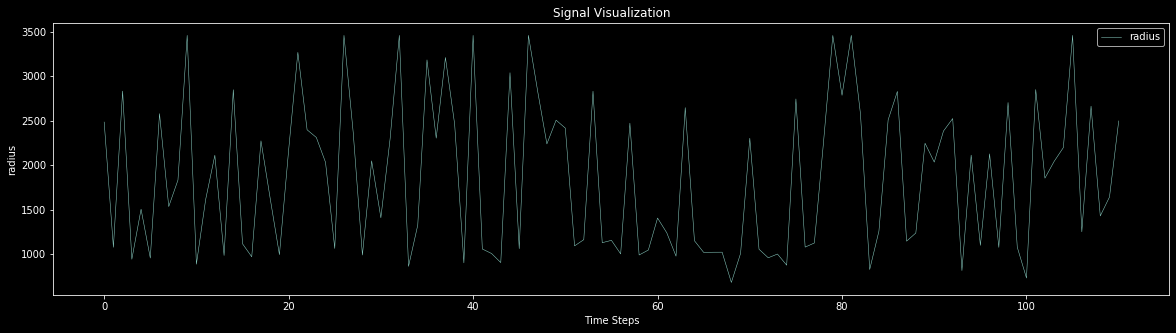

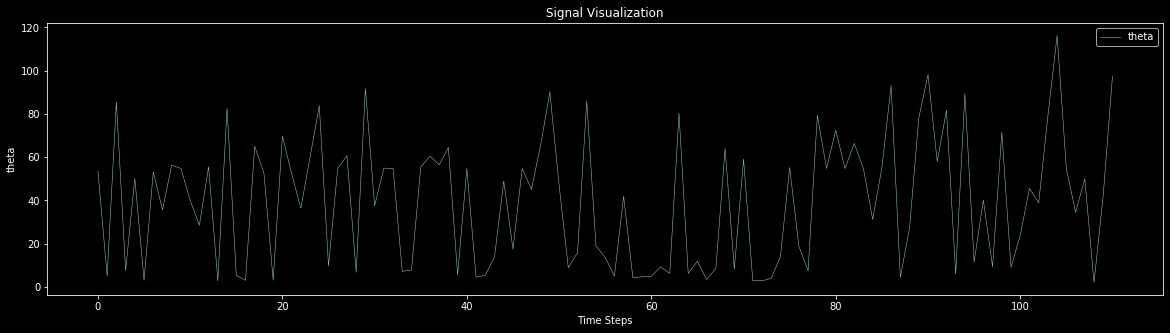

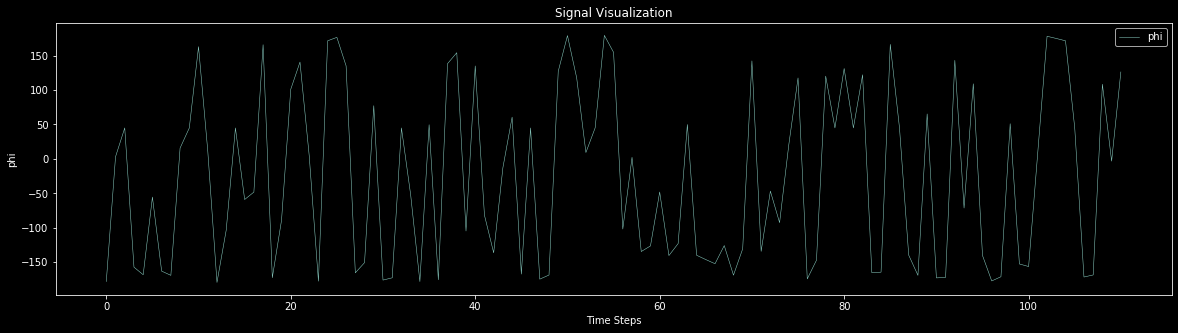

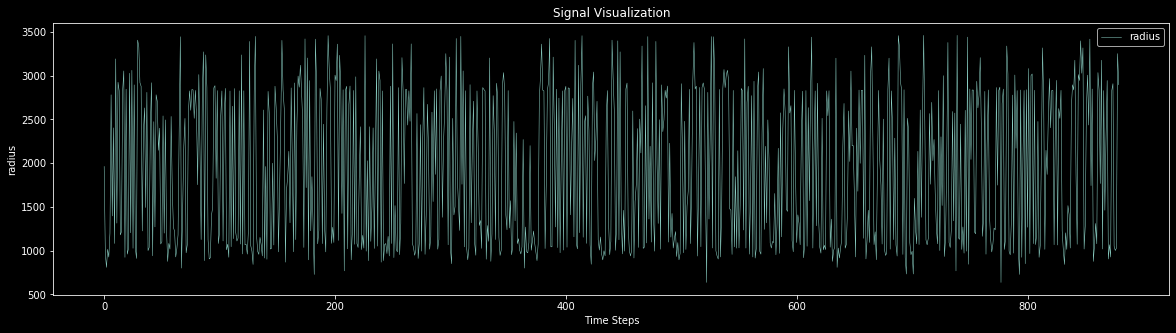

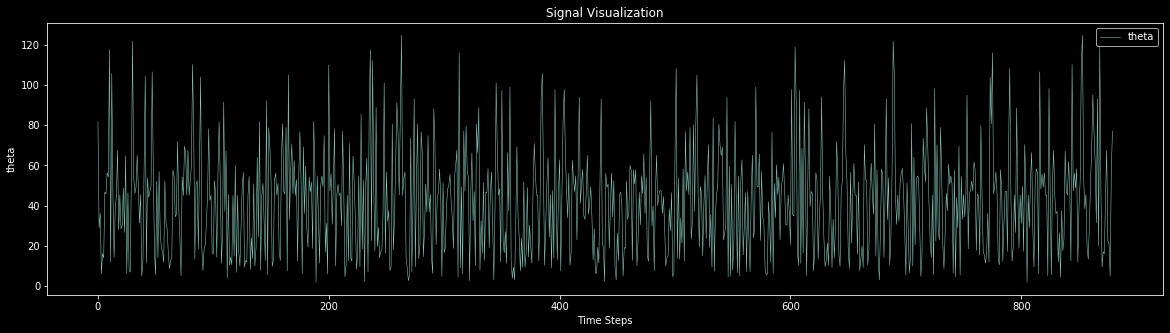

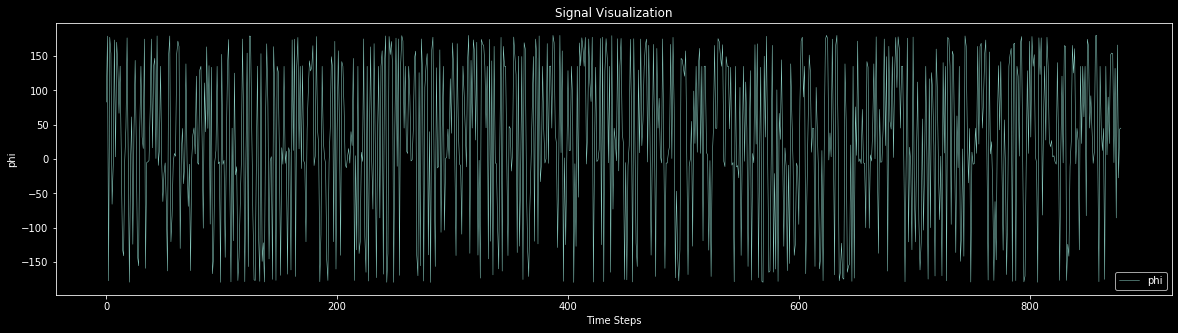

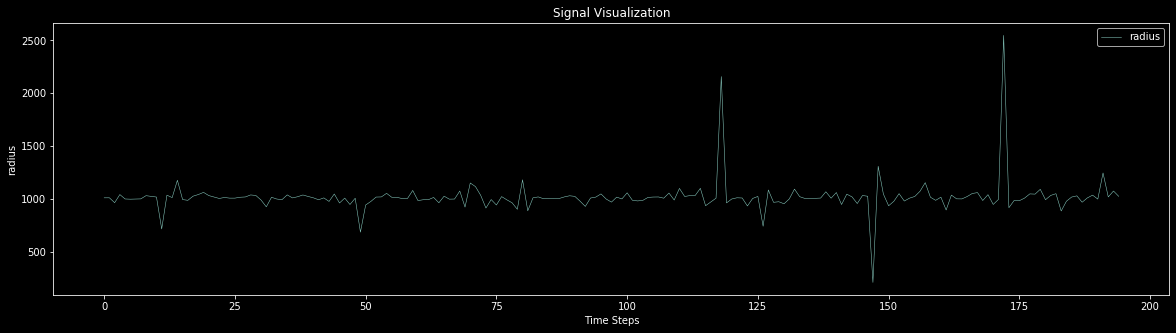

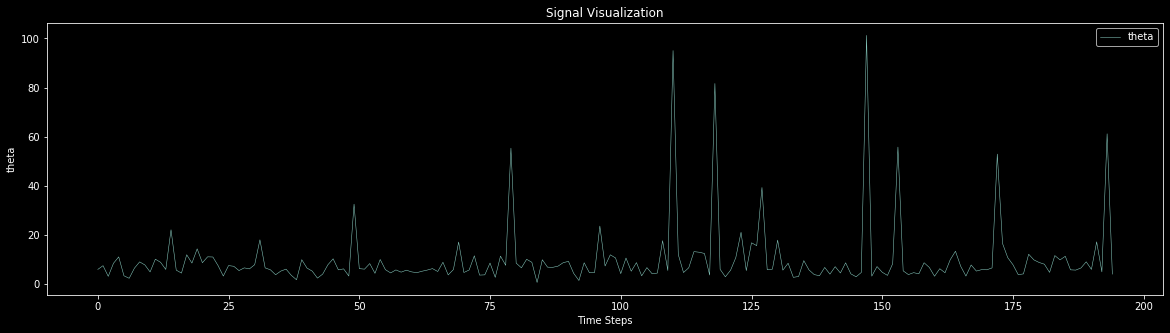

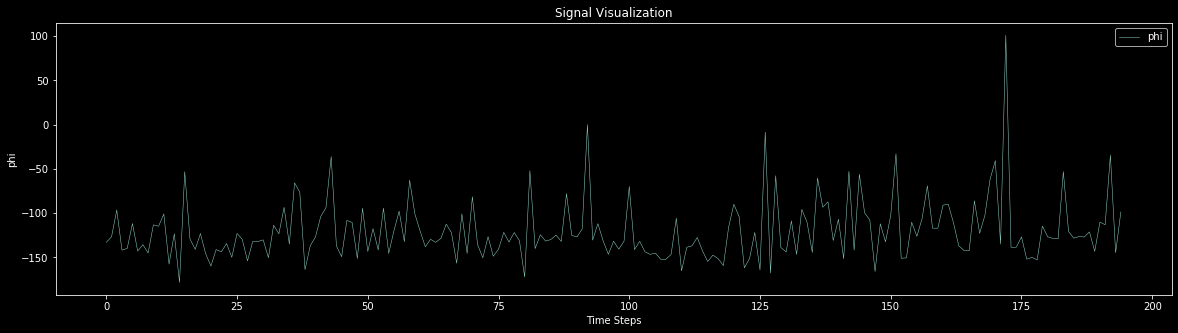

In [100]:
visualize_together(angles_values_sr)
visualize_together(angles_values_sl)
visualize_together(angles_values_ns)

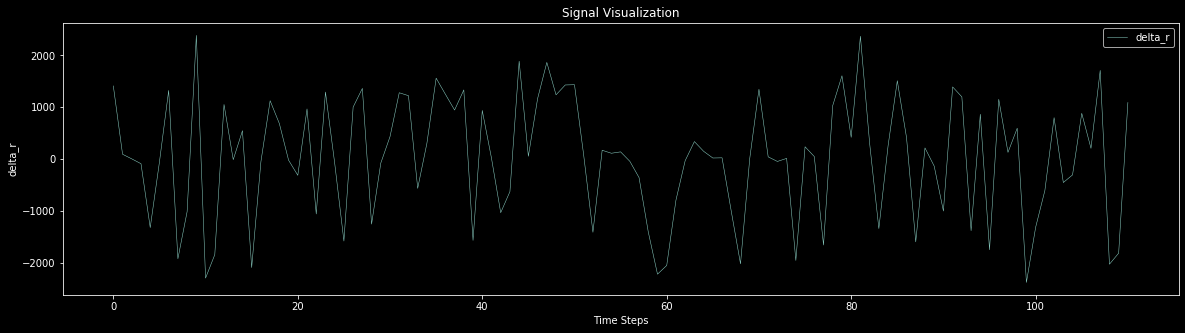

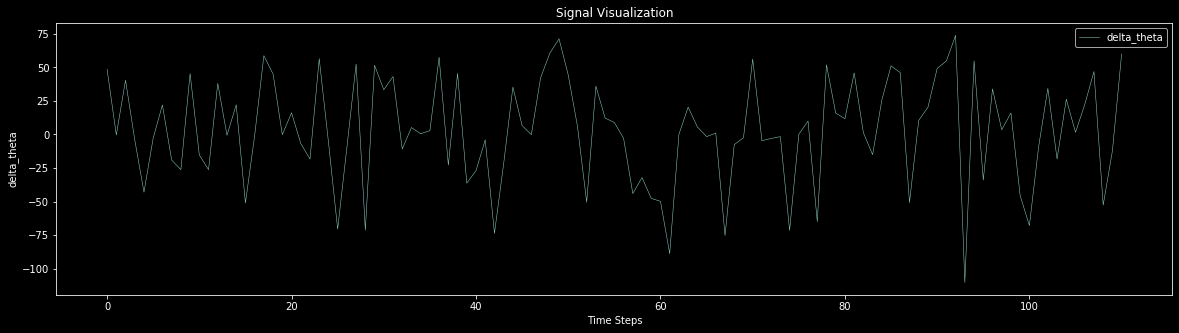

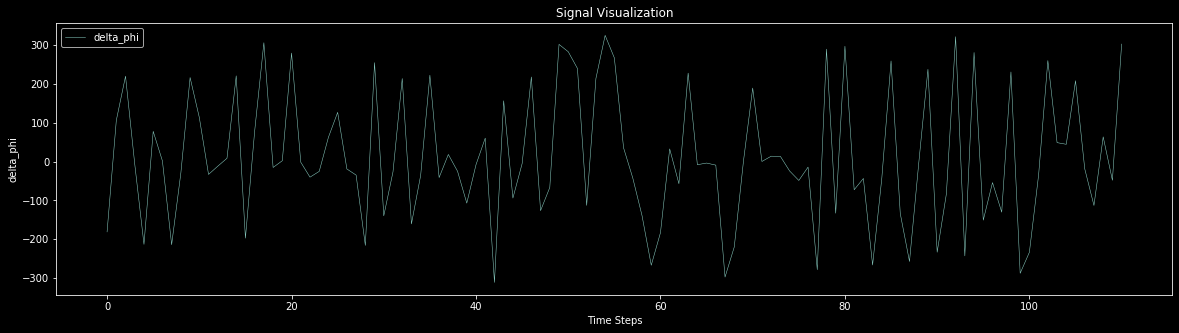

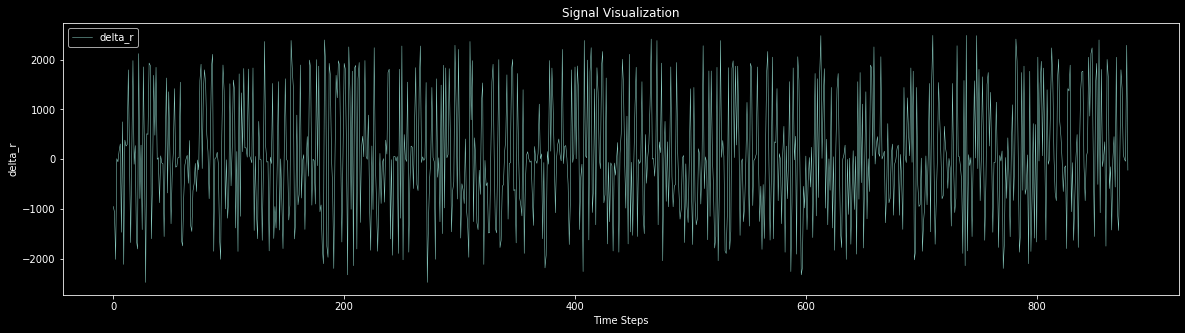

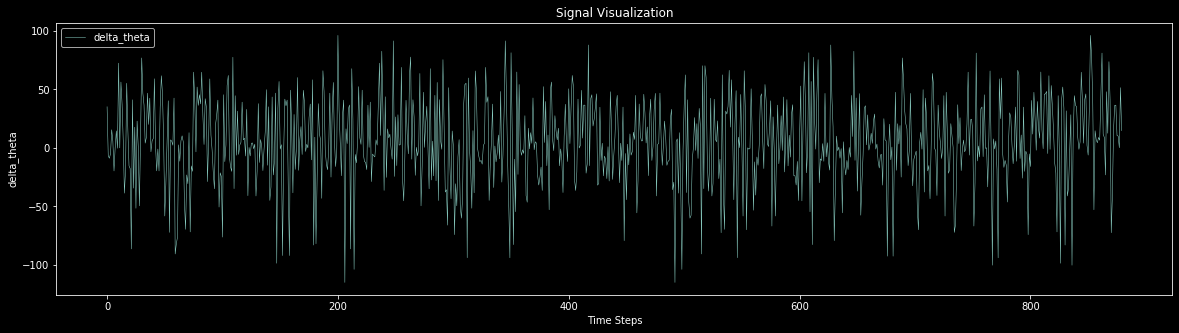

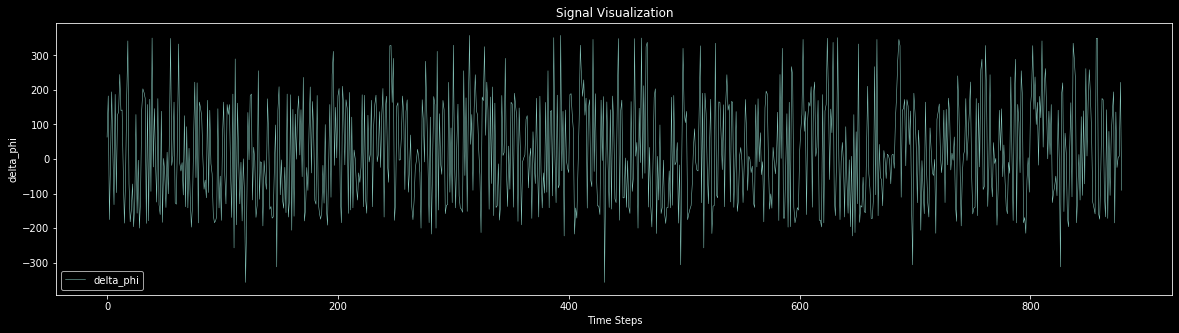

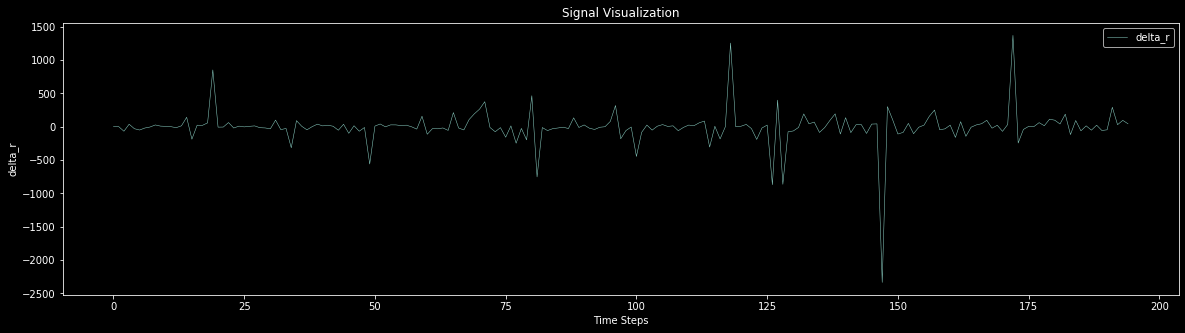

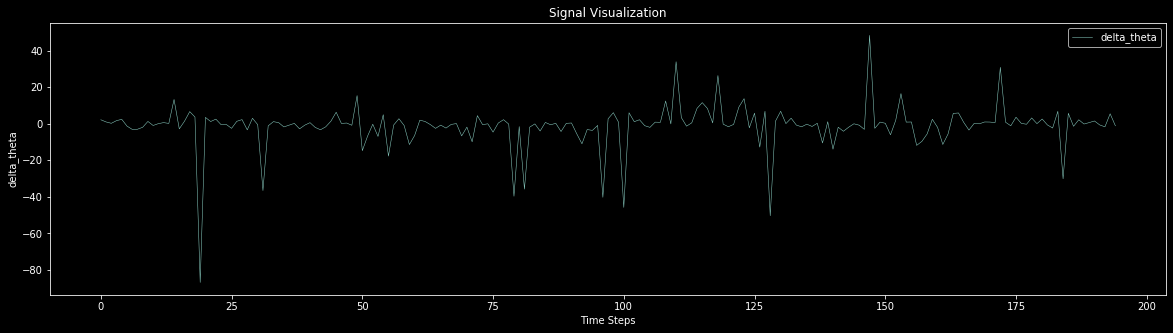

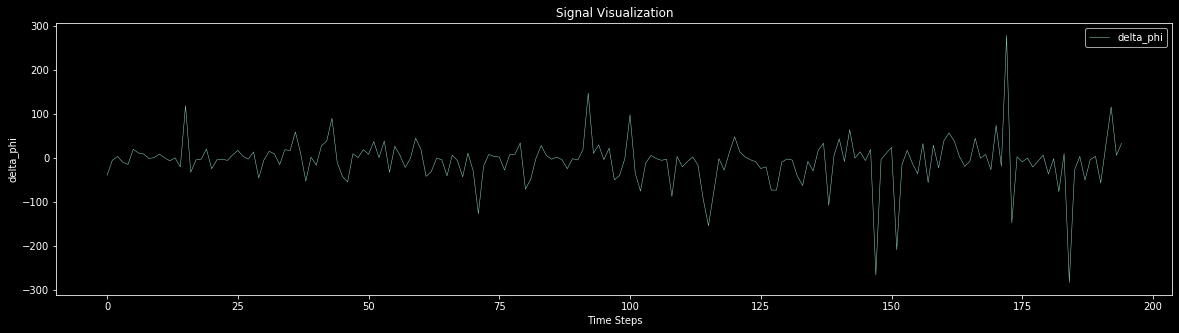

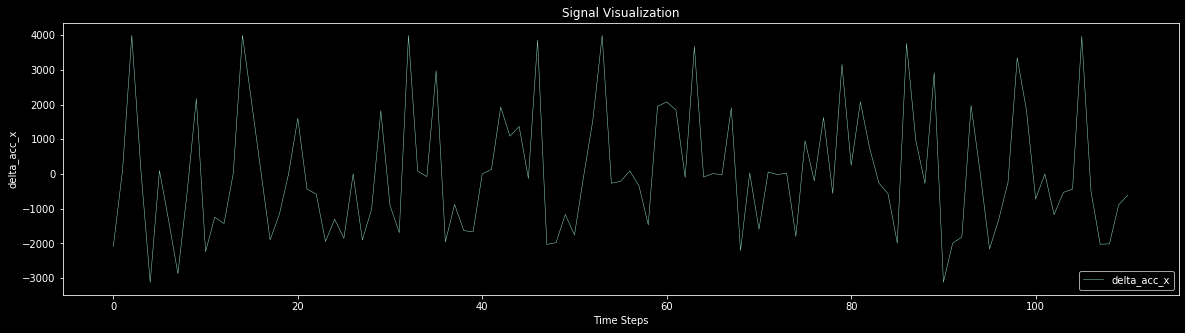

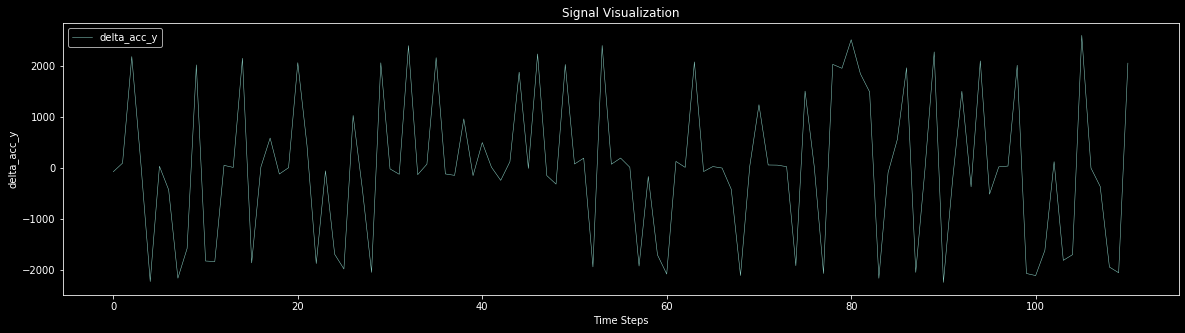

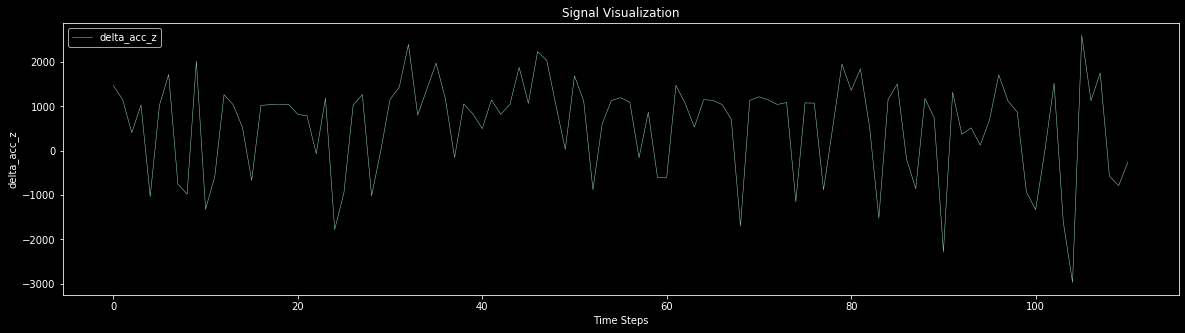

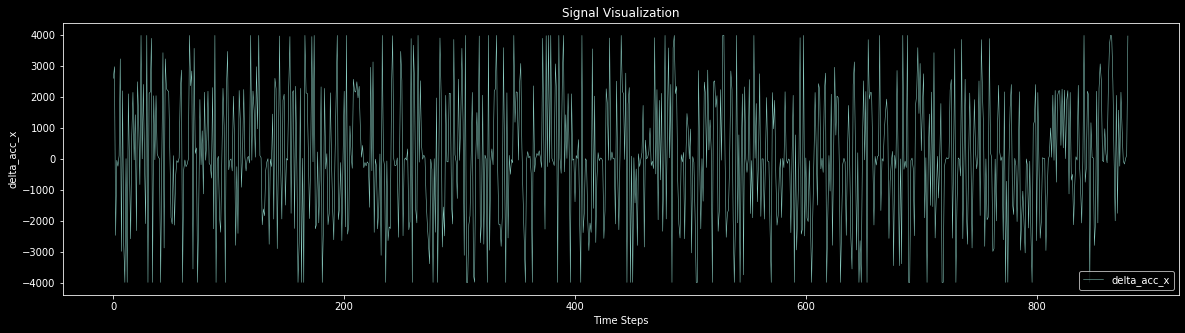

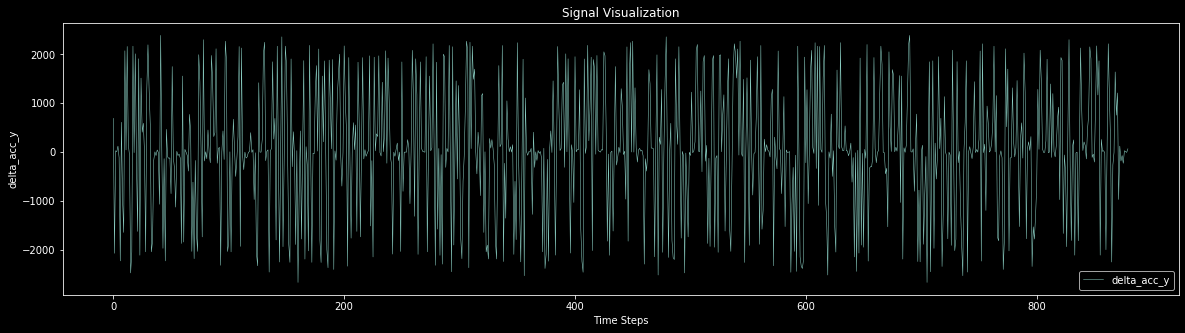

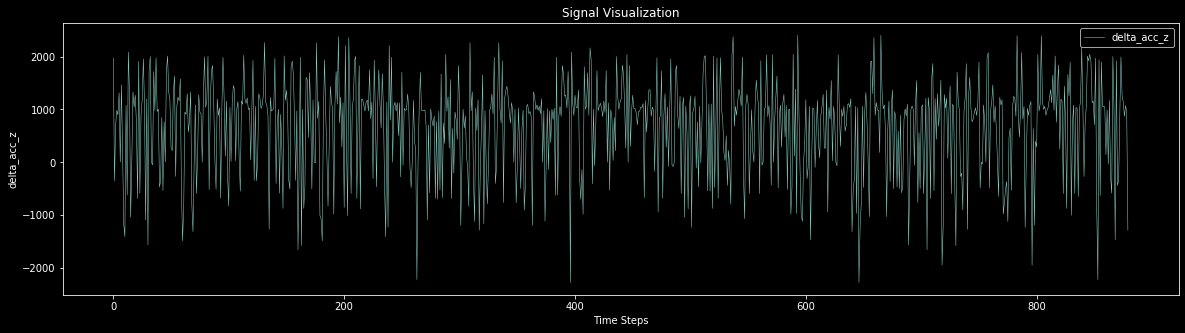

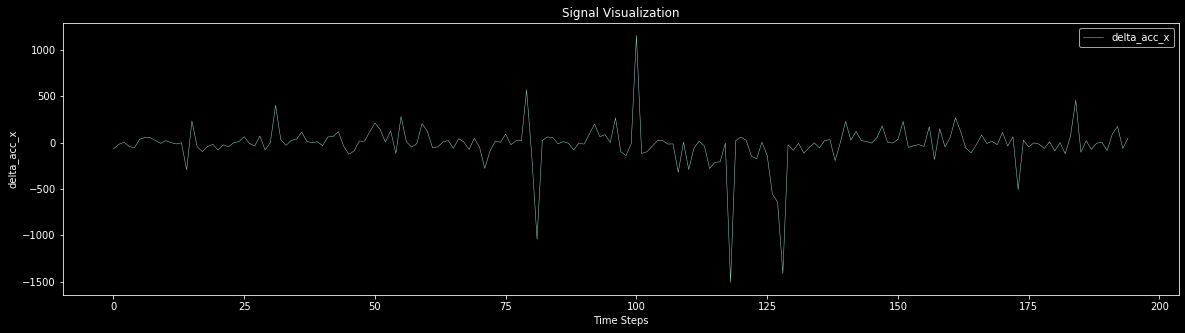

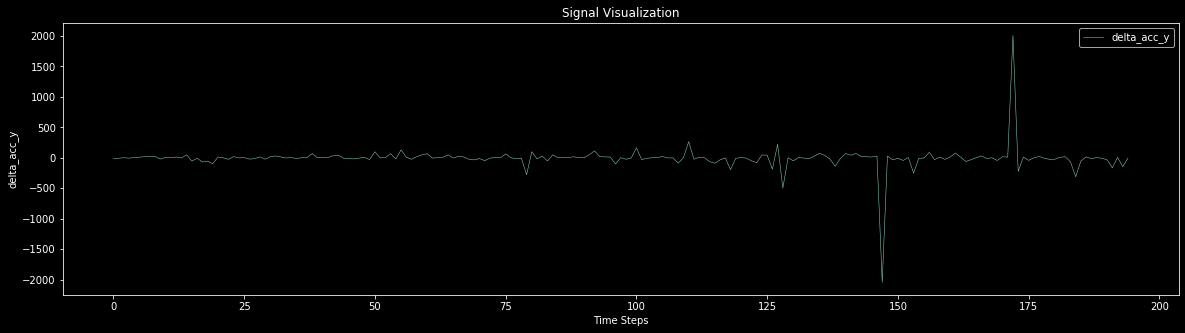

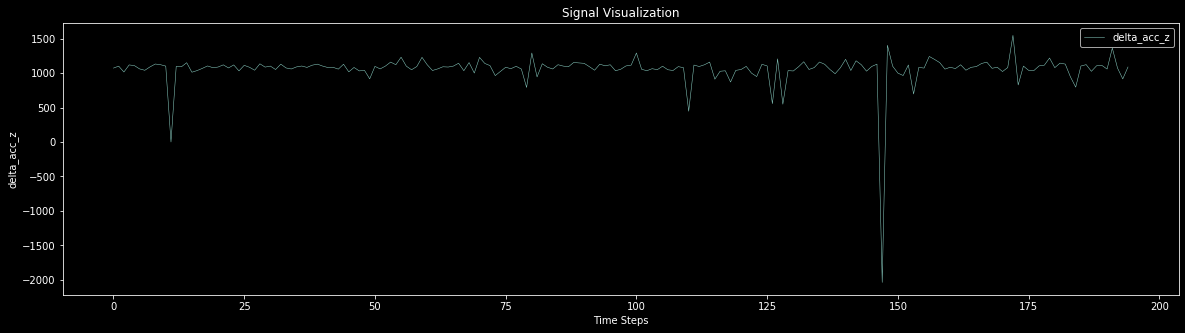

In [105]:
# total visualization
visualize_separetly(change_angles_values_sr)
visualize_separetly(change_angles_values_sl)
visualize_separetly(change_angles_values_ns)

visualize_separetly(change_acc_values_sr)
visualize_separetly(change_acc_values_sl)
visualize_separetly(change_acc_values_ns)

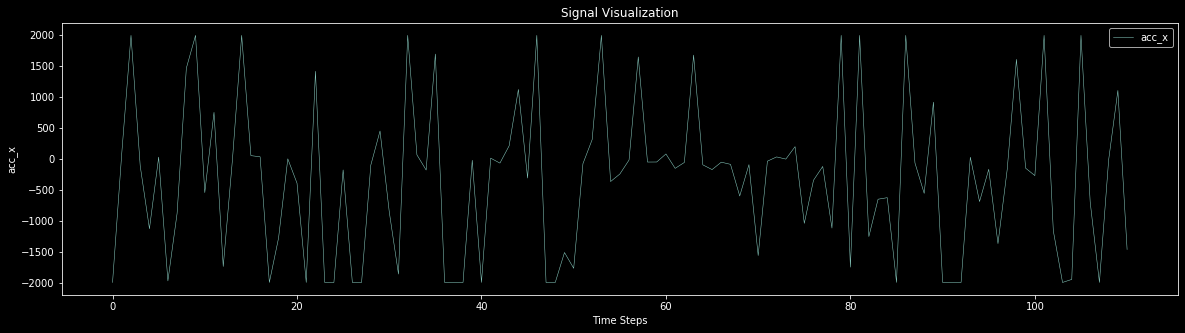

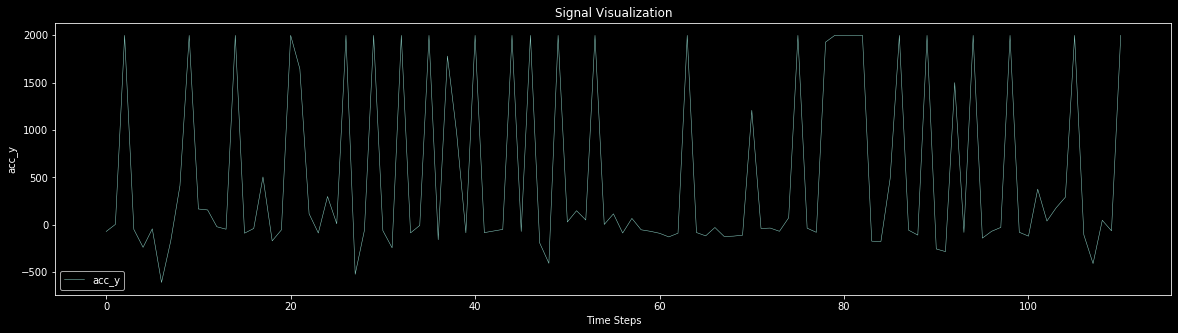

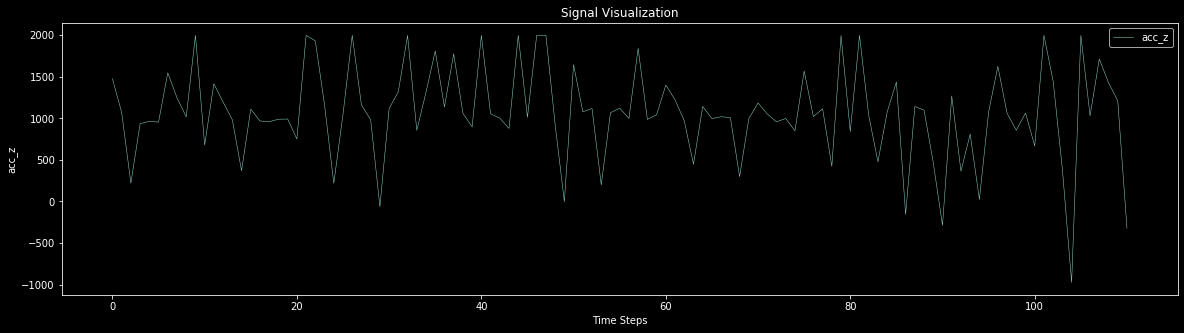

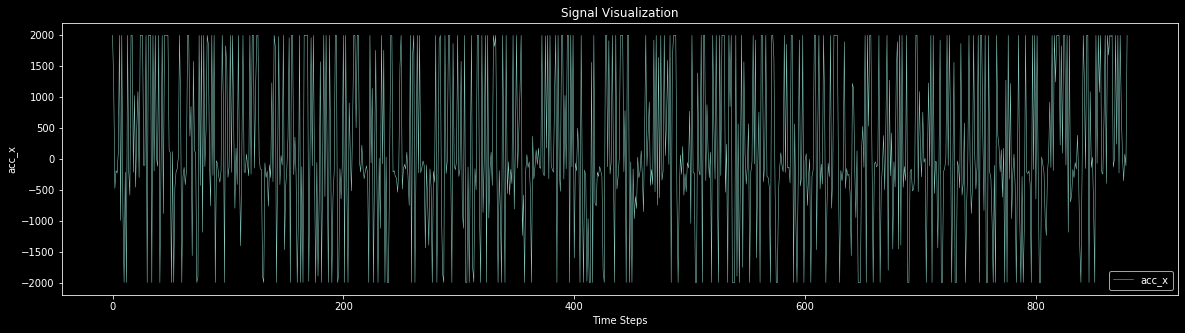

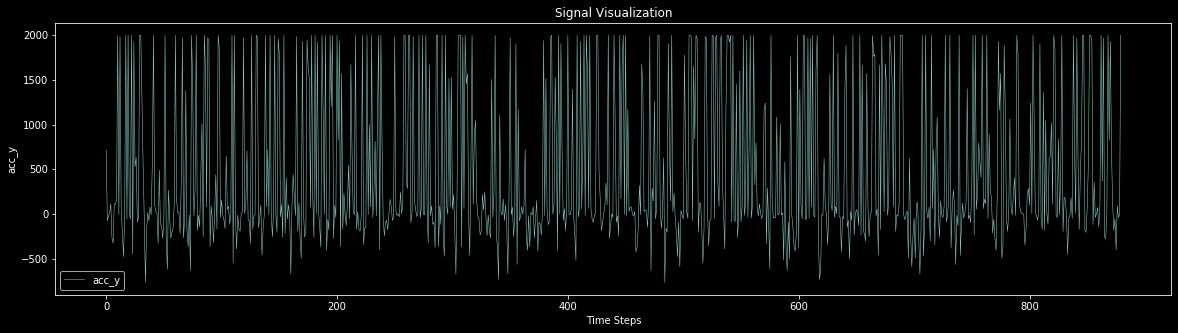

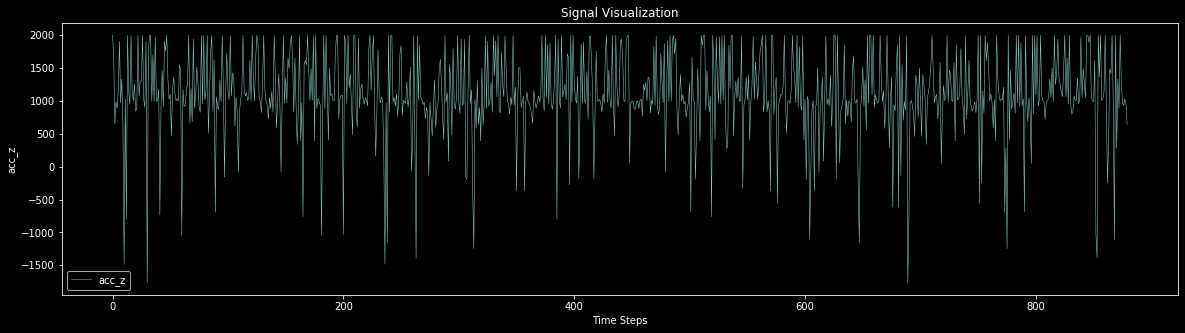

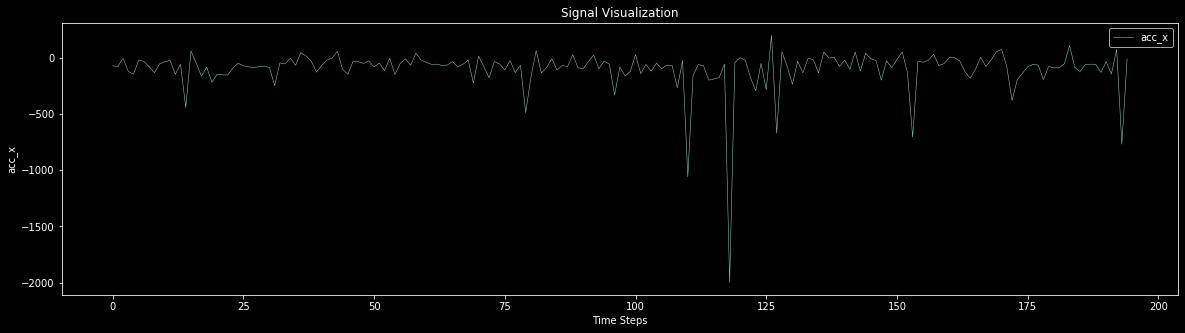

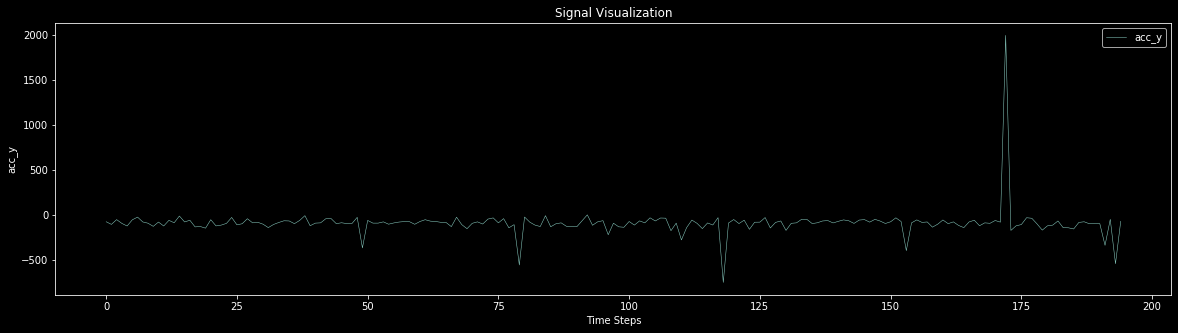

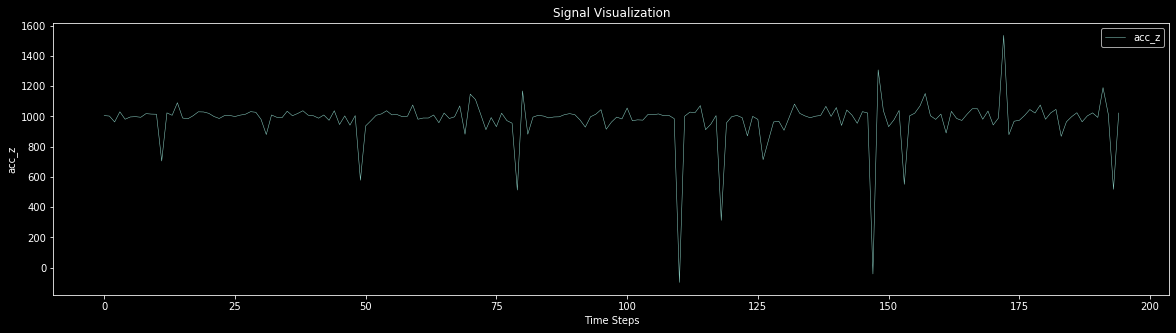

In [106]:
visualize_separetly(acceleration_values_sr)
visualize_separetly(acceleration_values_sl)
visualize_separetly(acceleration_values_ns)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, 

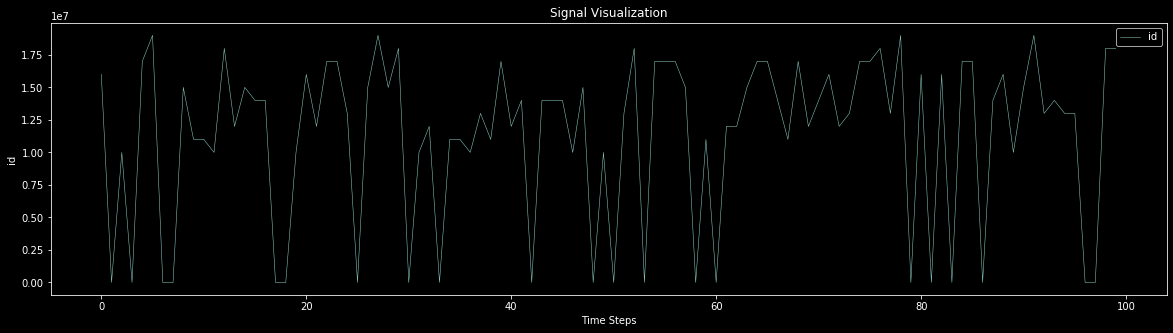

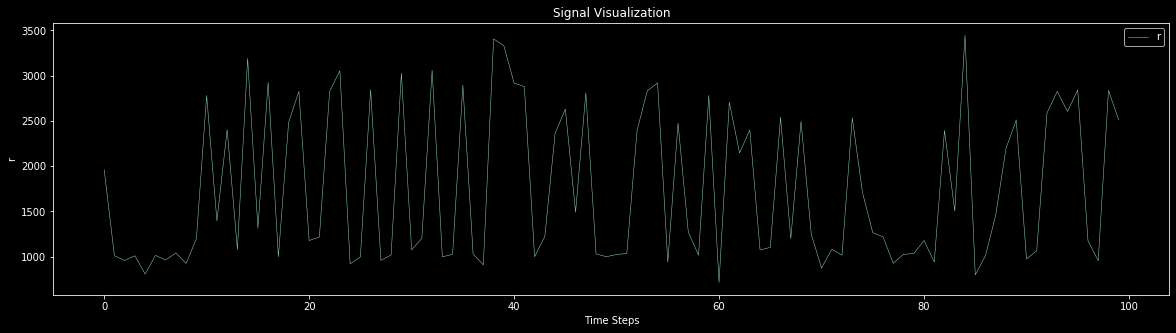

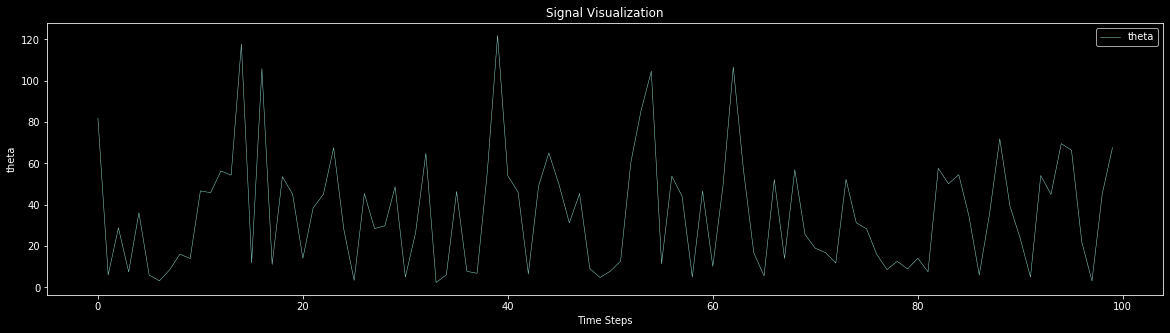

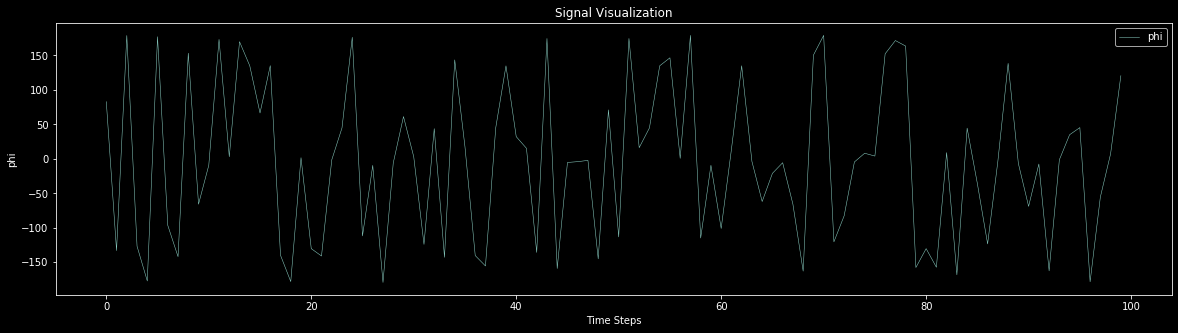

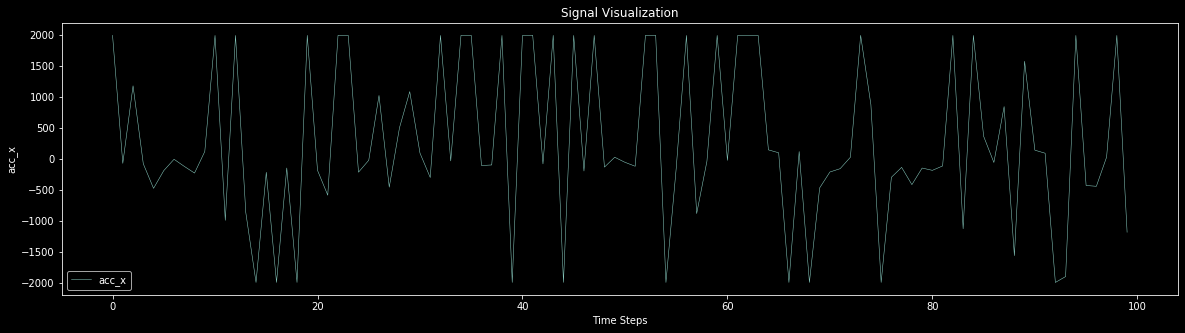

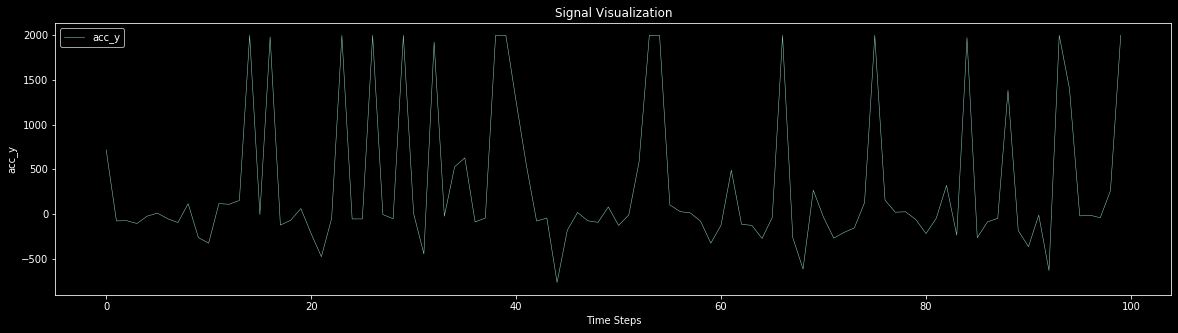

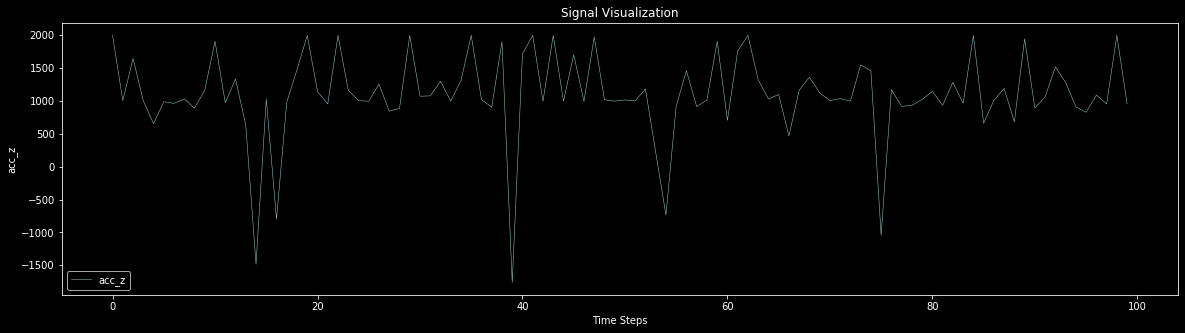

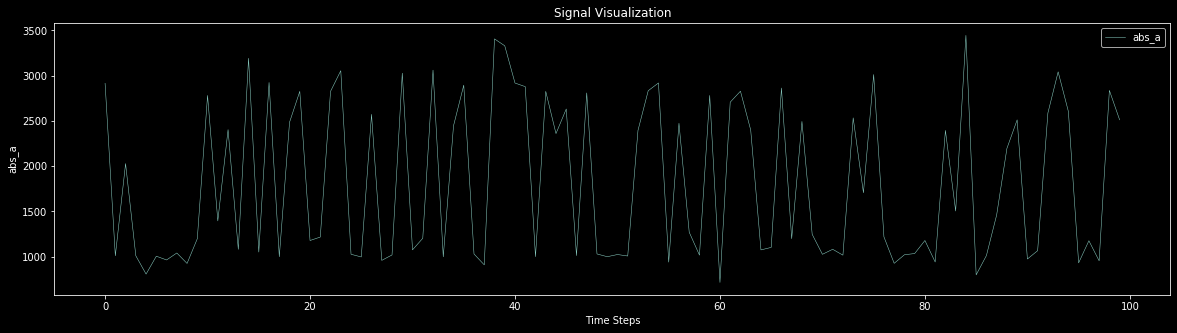

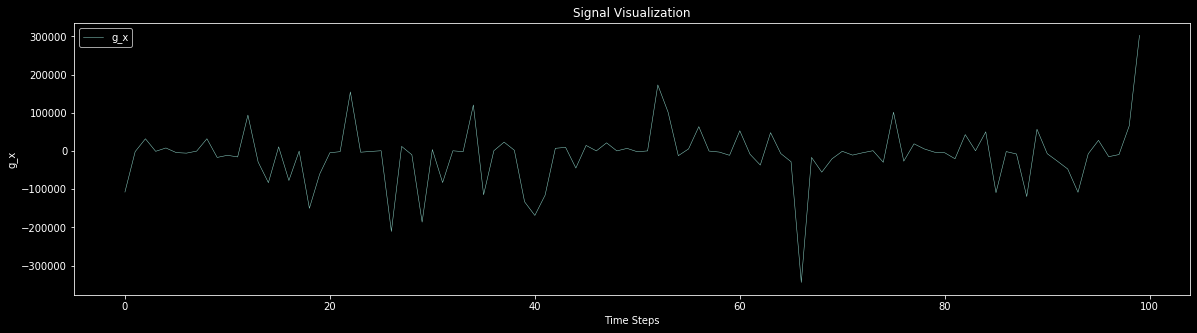

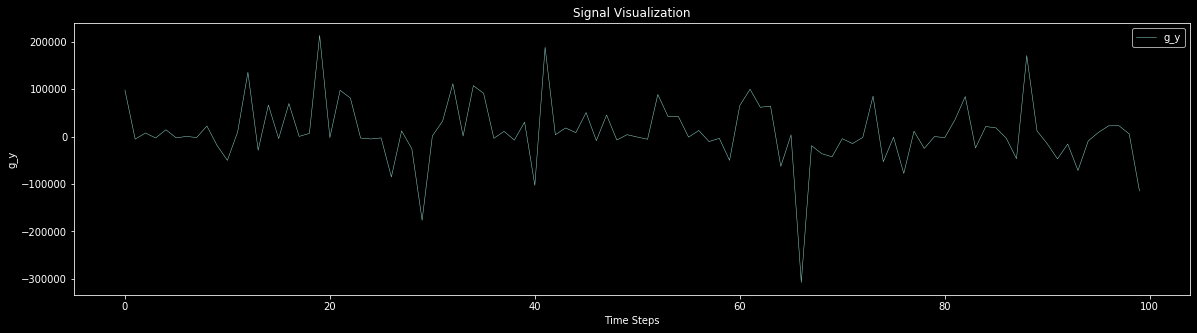

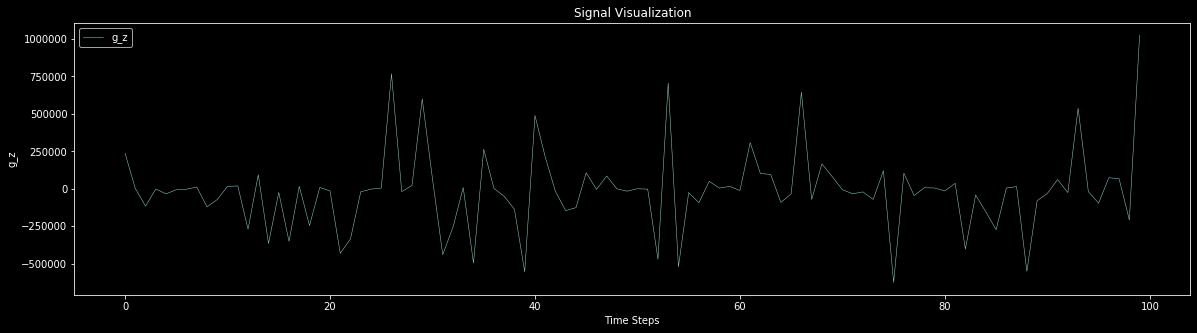

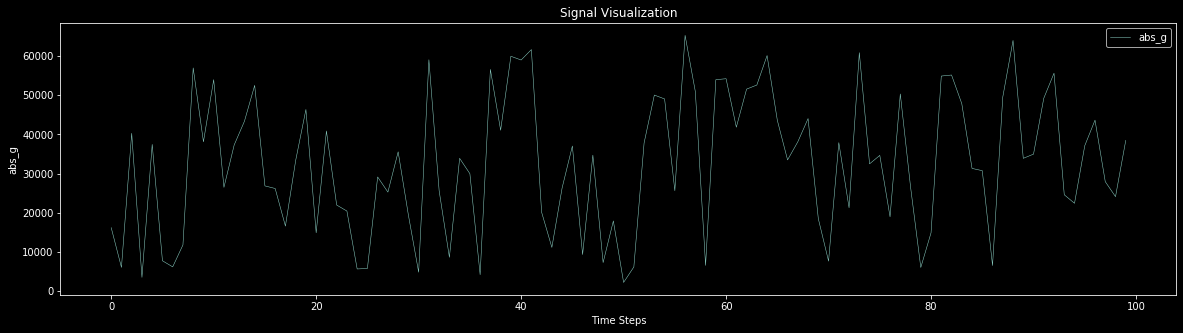

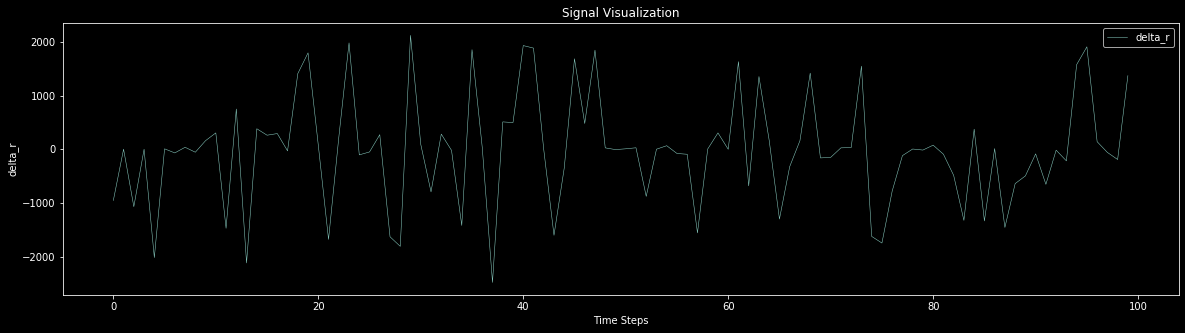

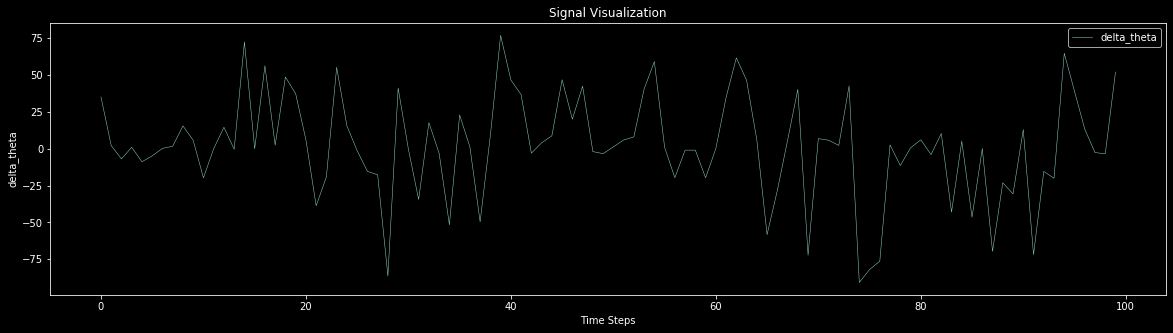

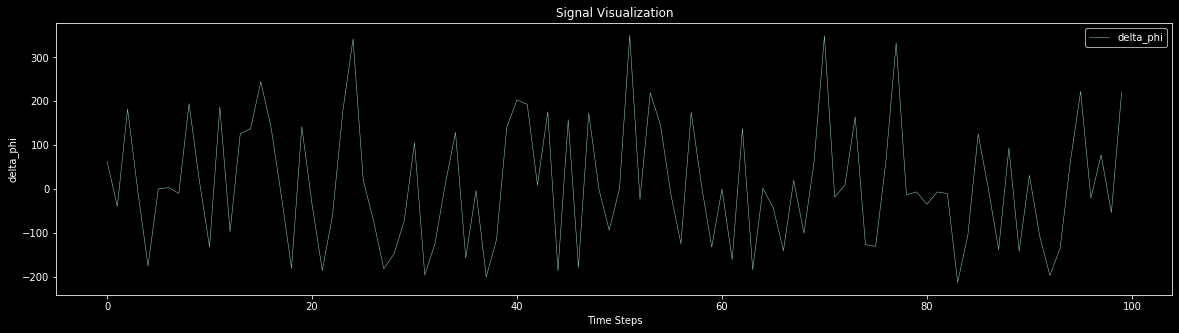

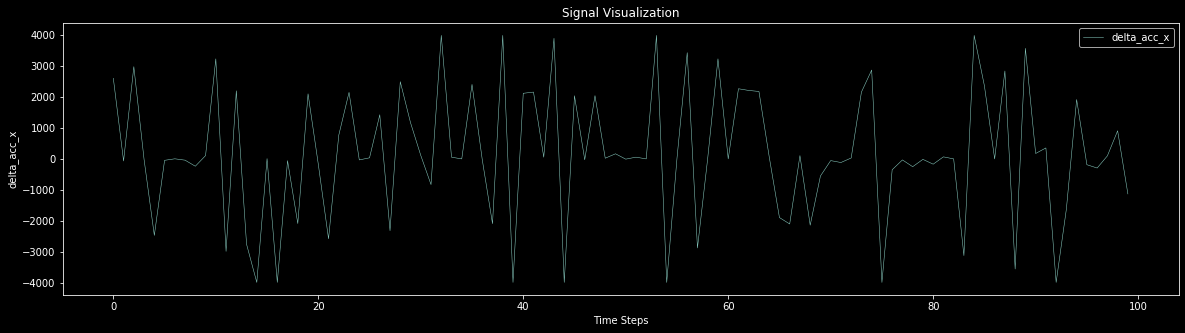

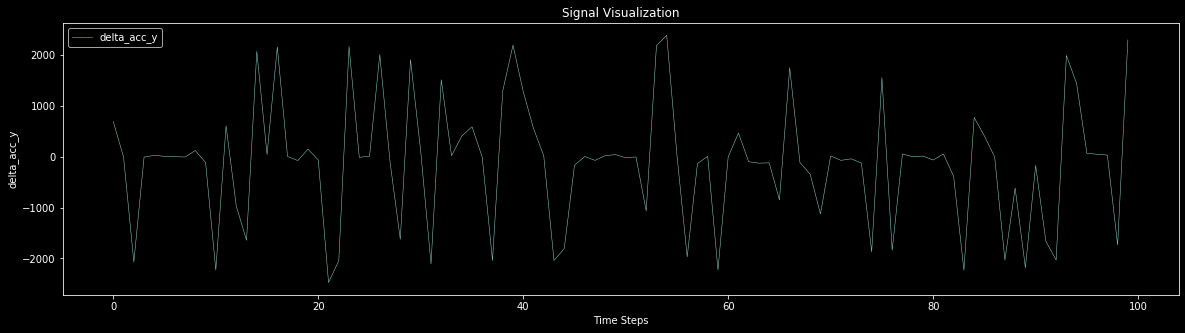

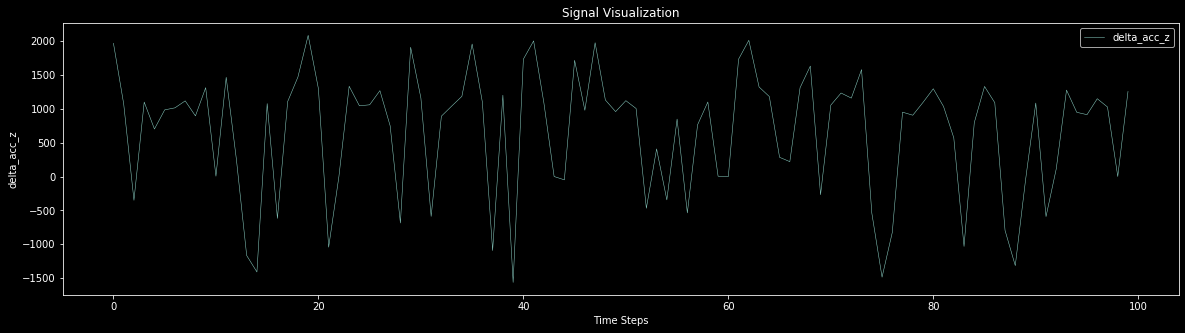

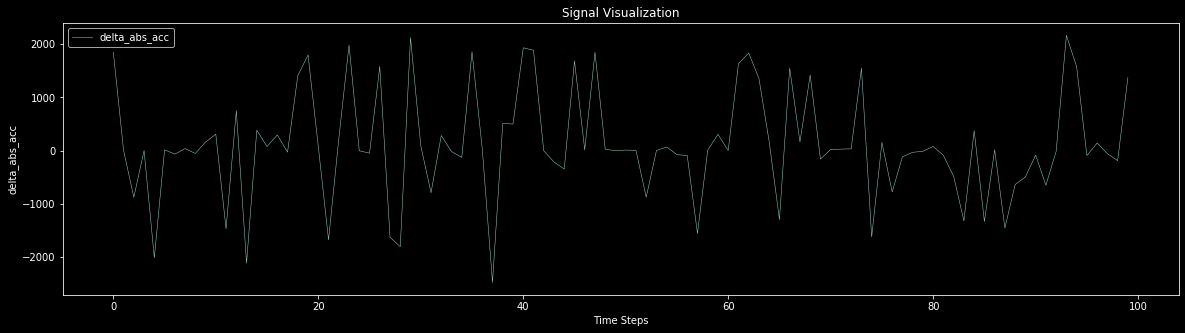

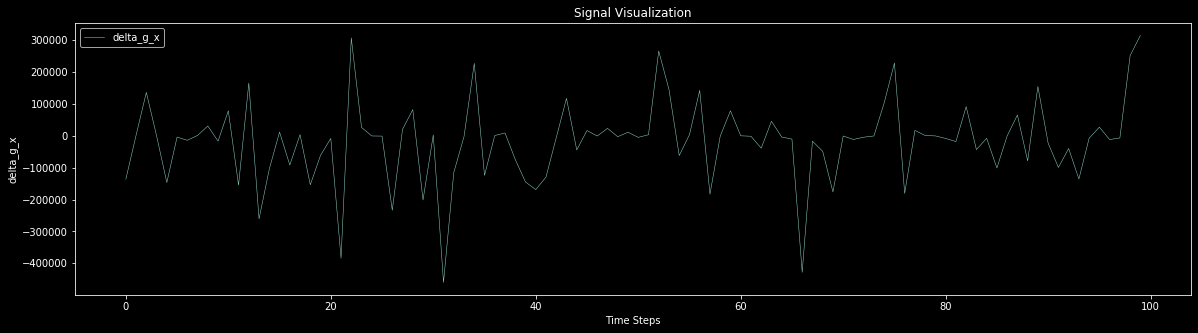

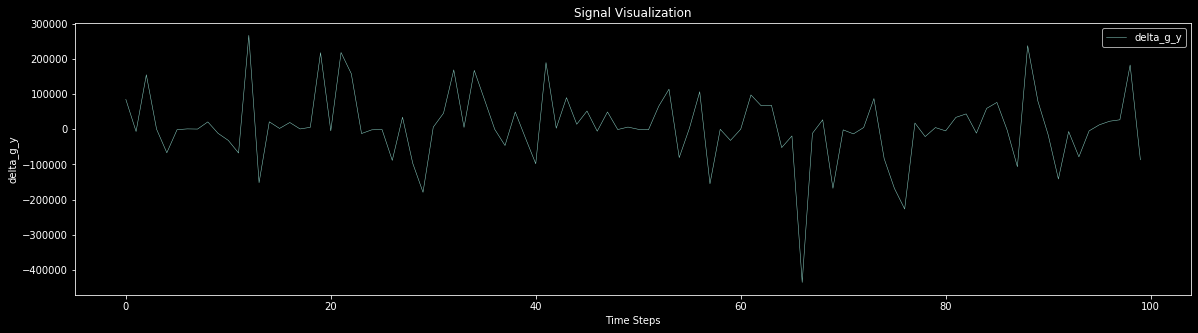

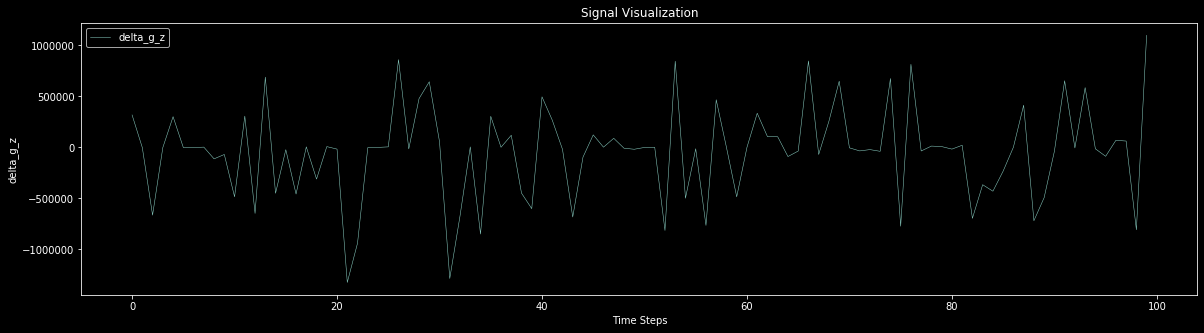

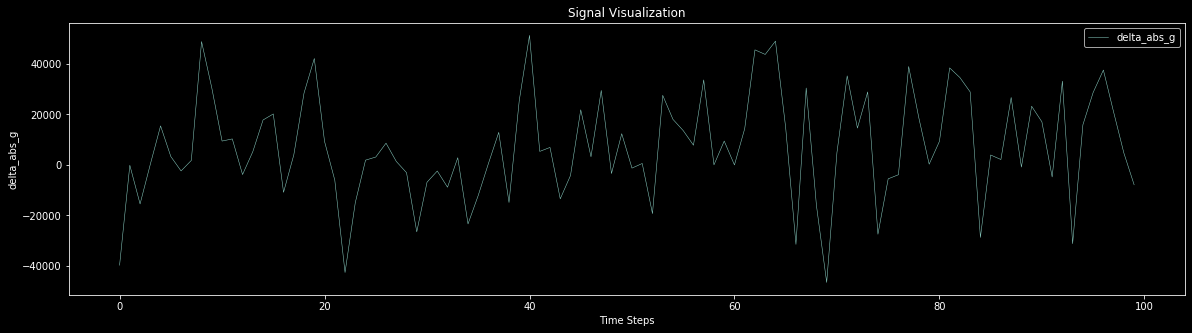

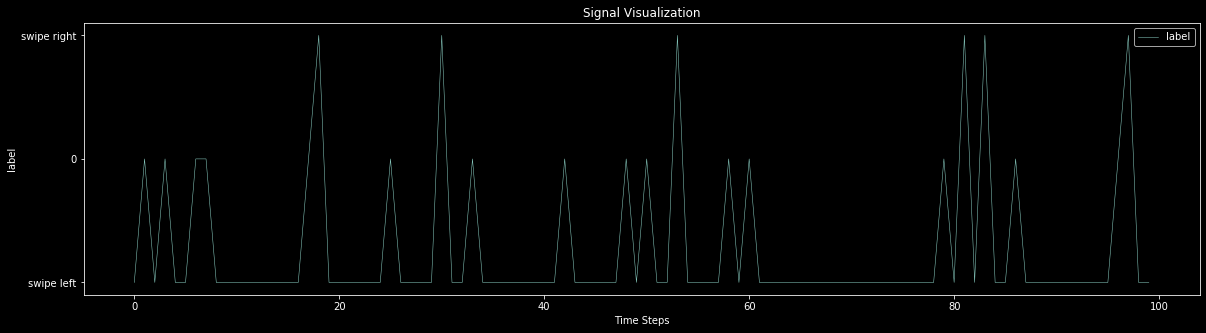

In [111]:
visualize_together(df.head(100))

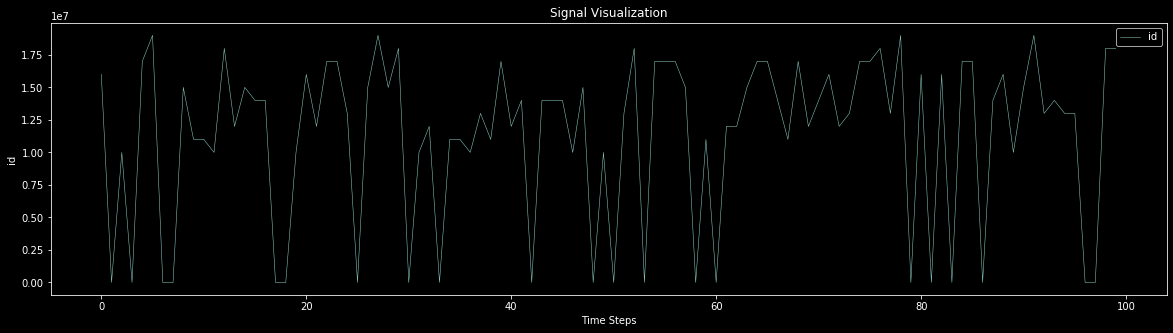

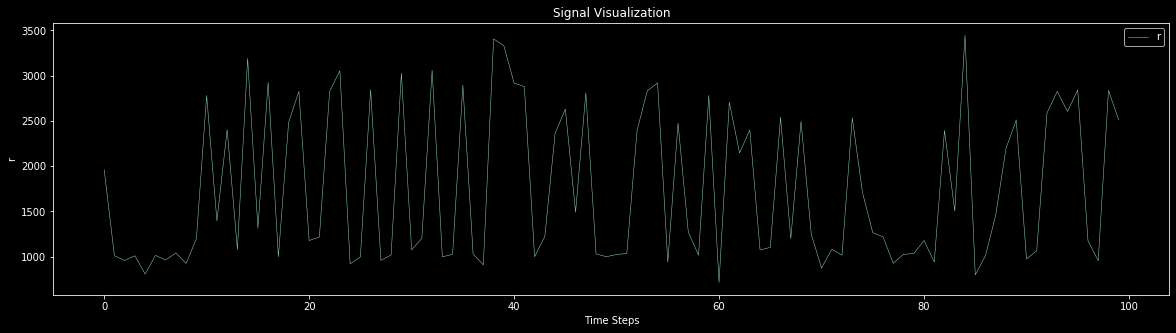

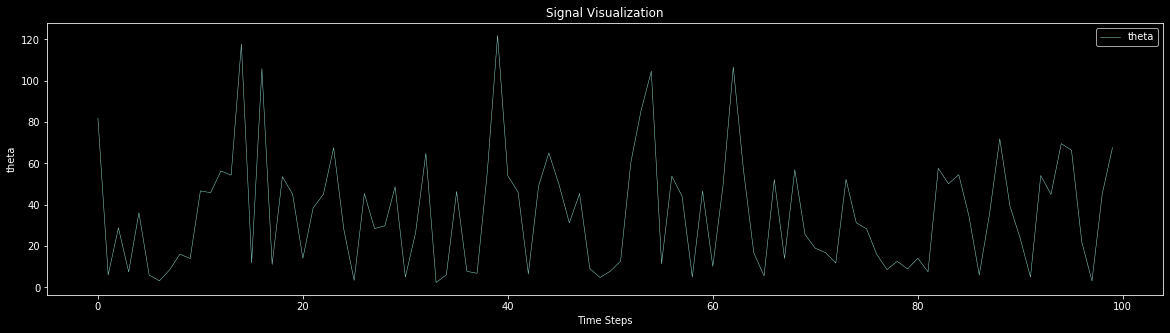

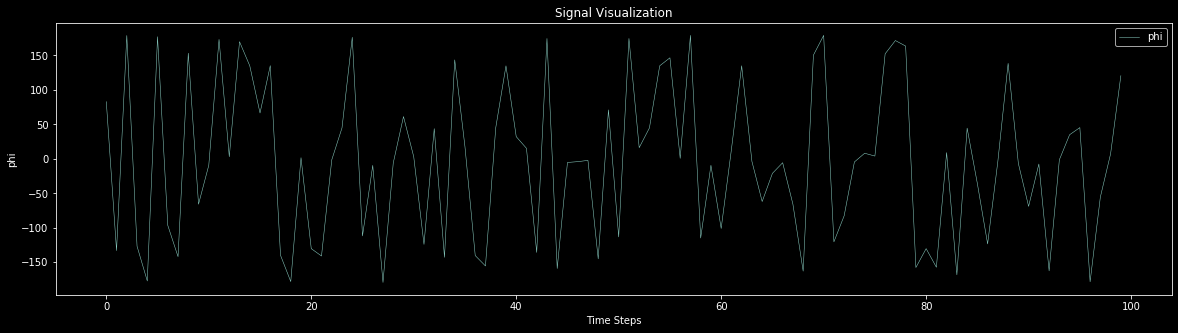

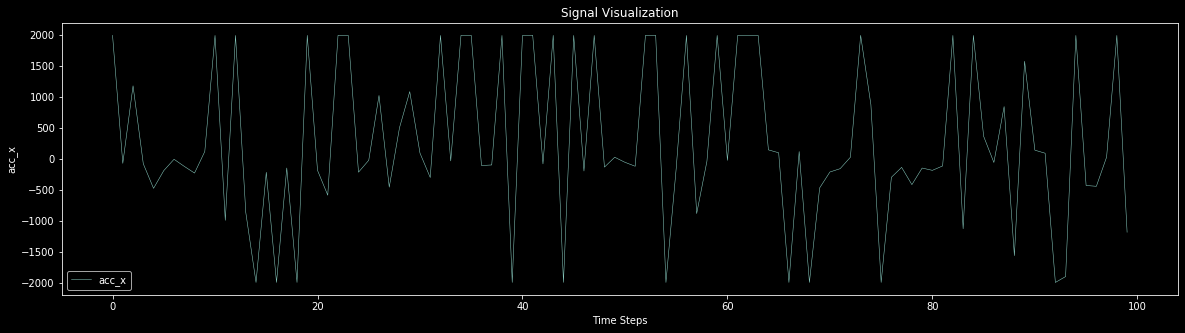

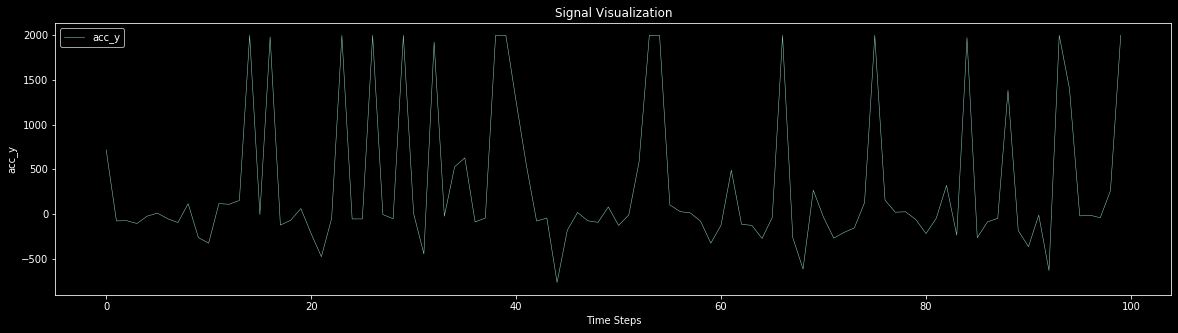

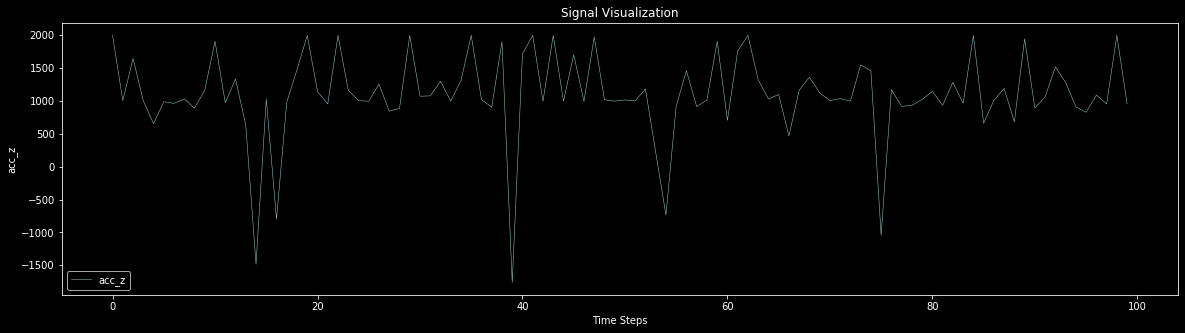

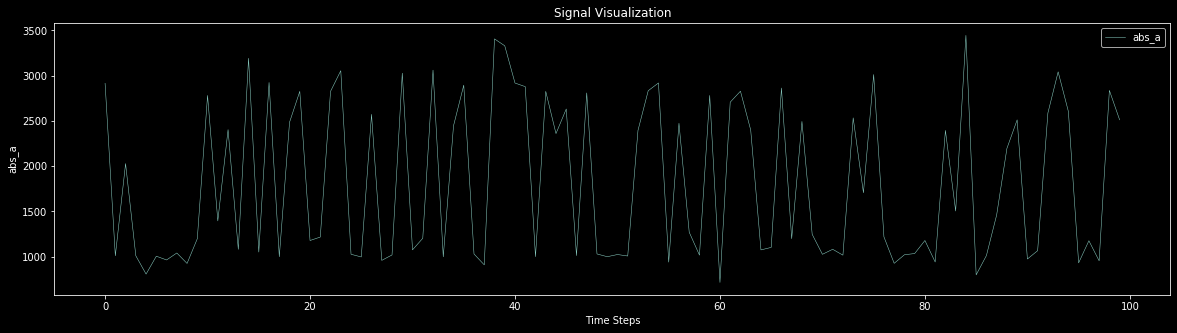

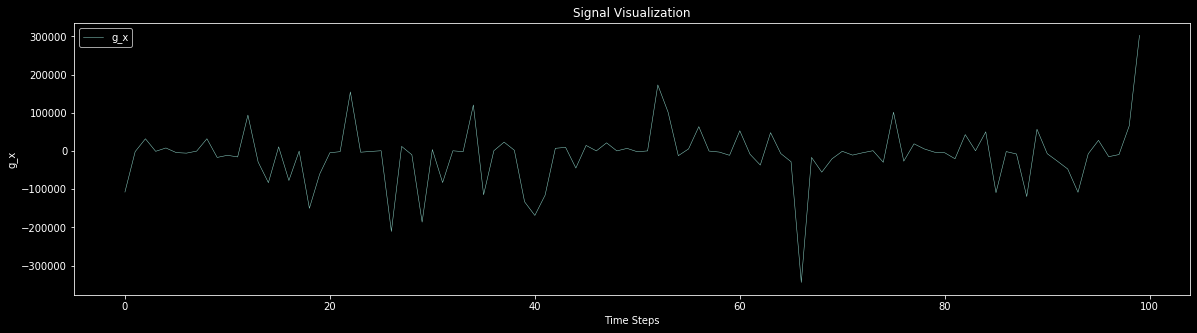

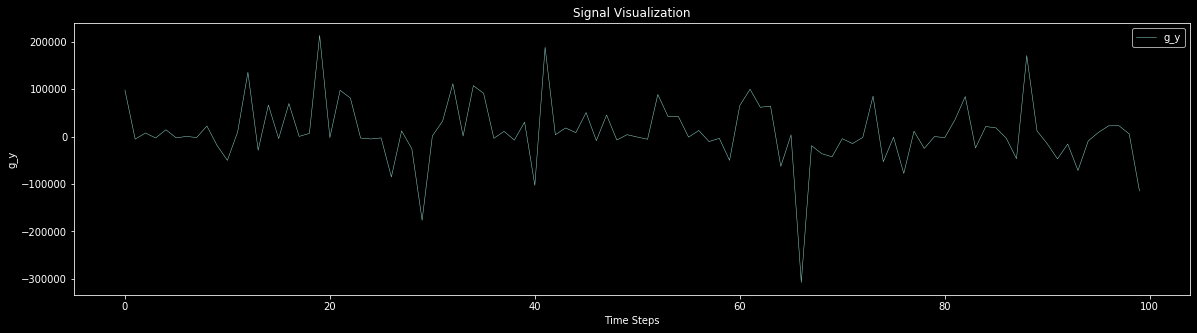

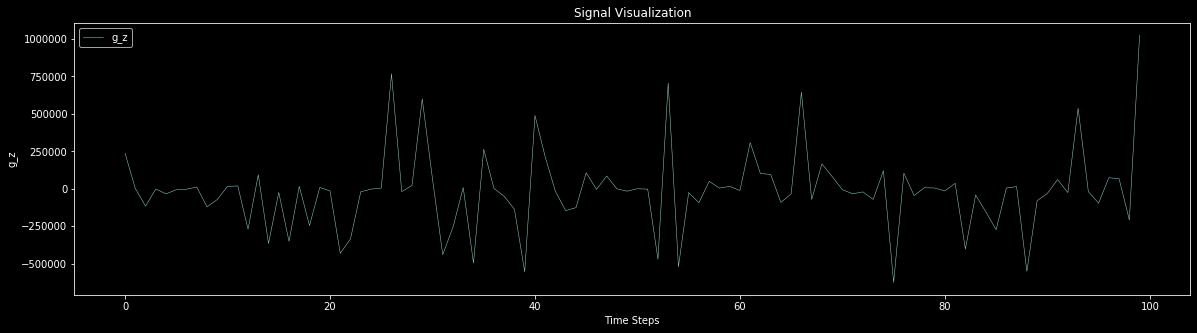

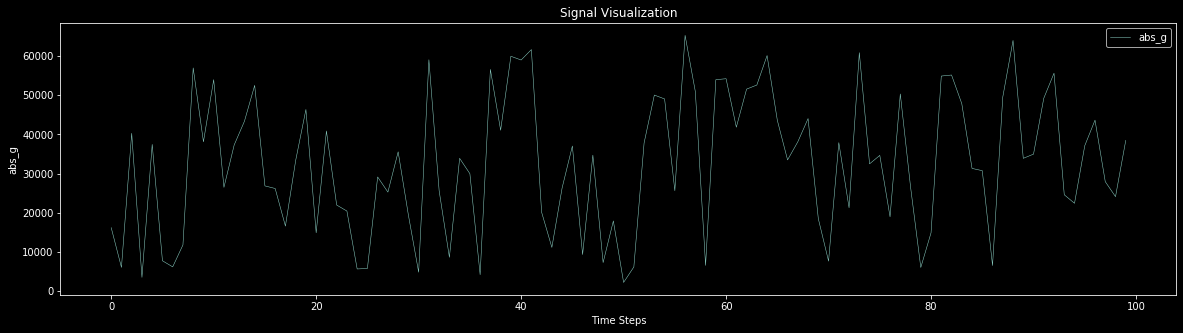

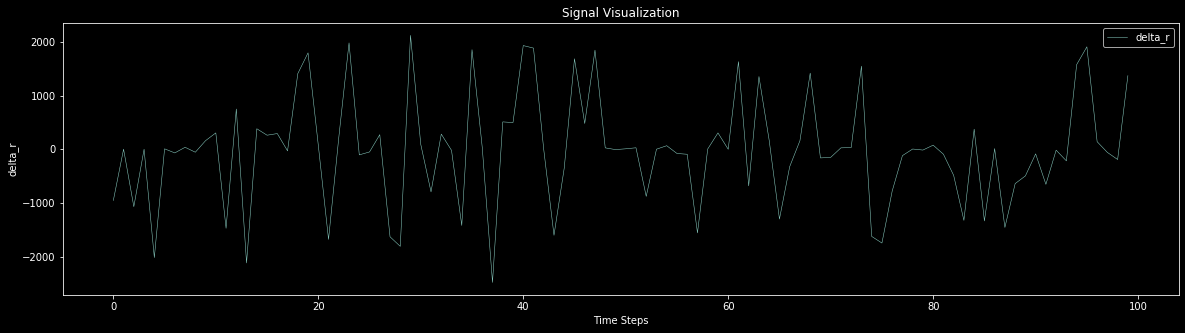

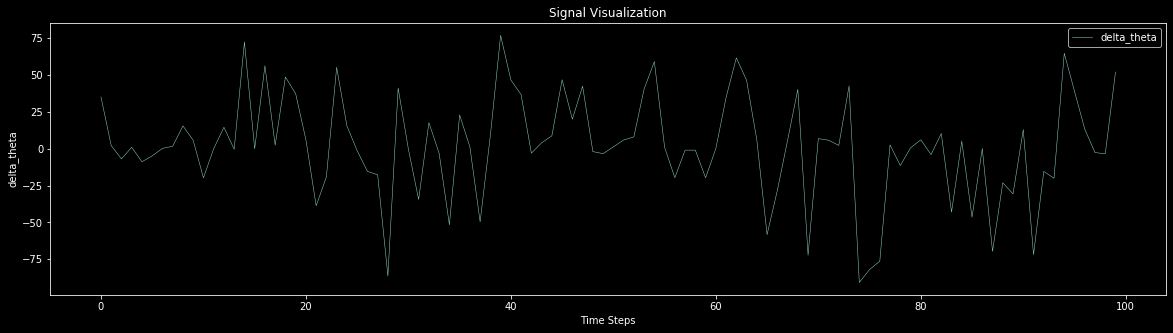

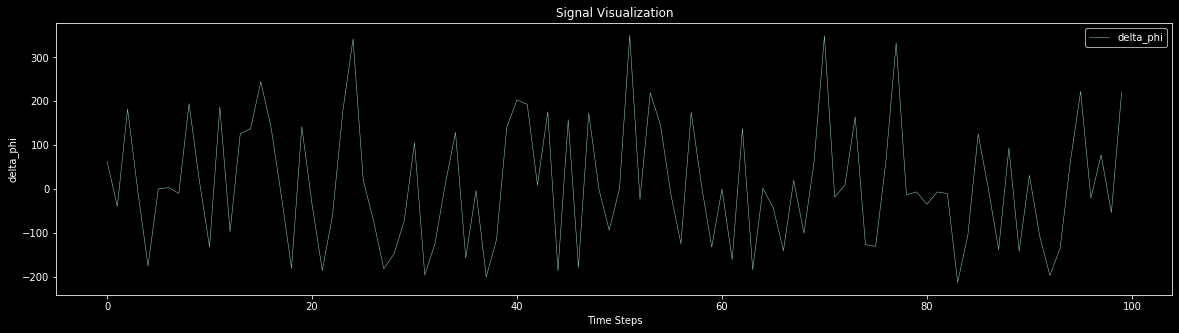

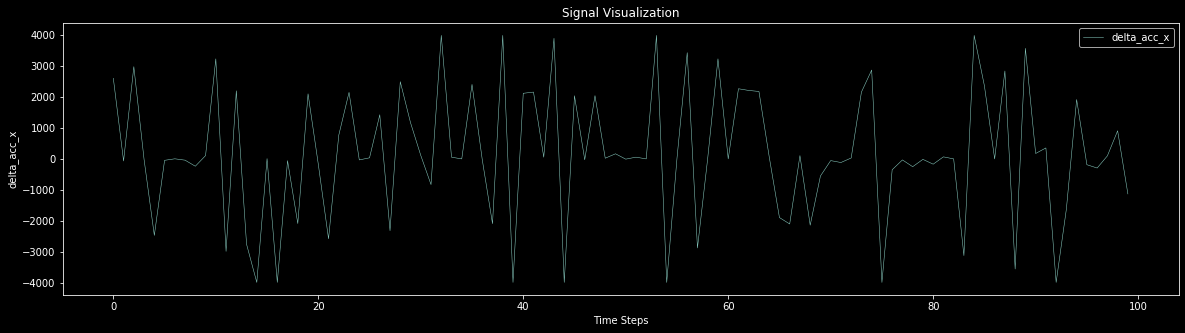

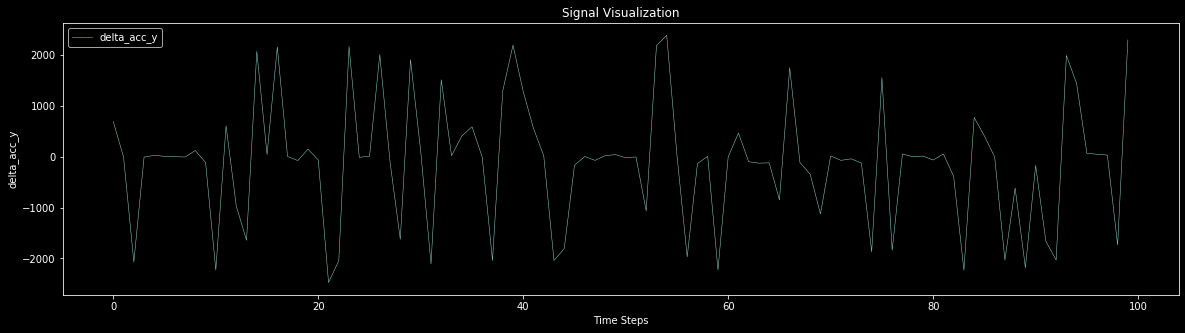

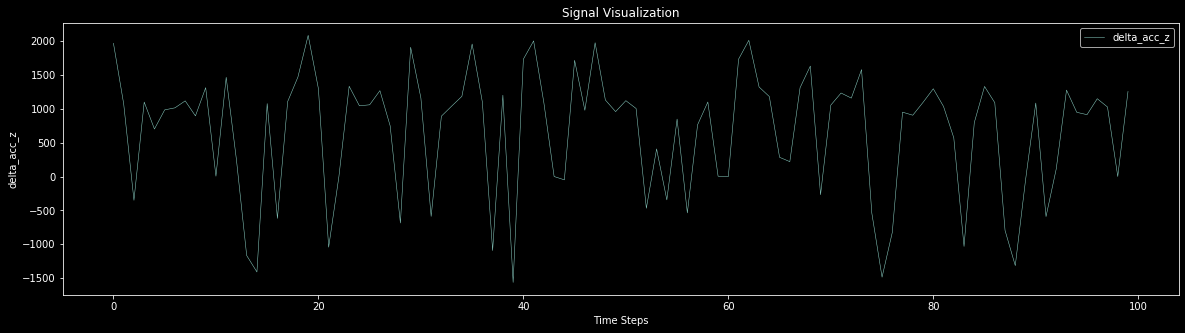

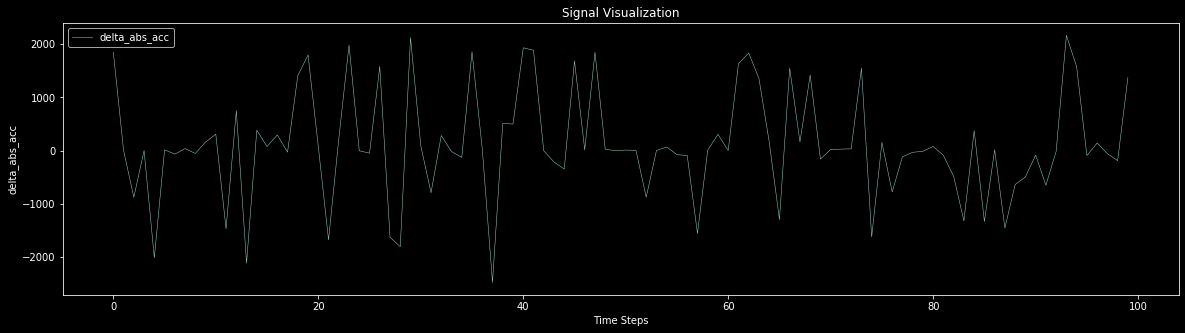

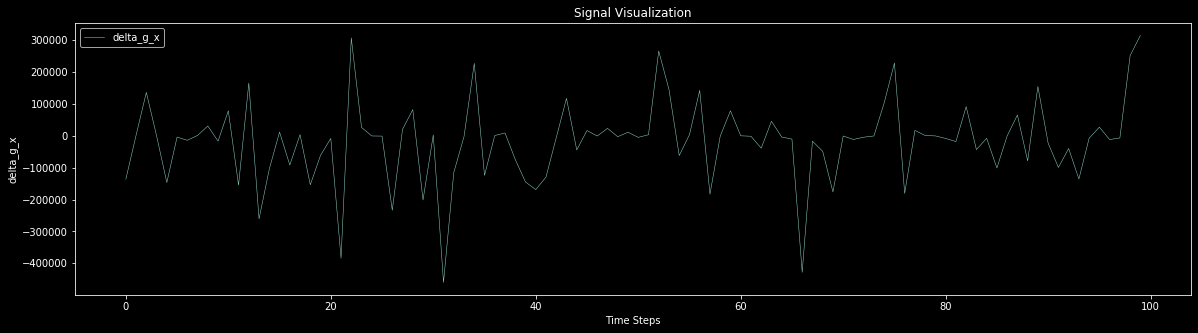

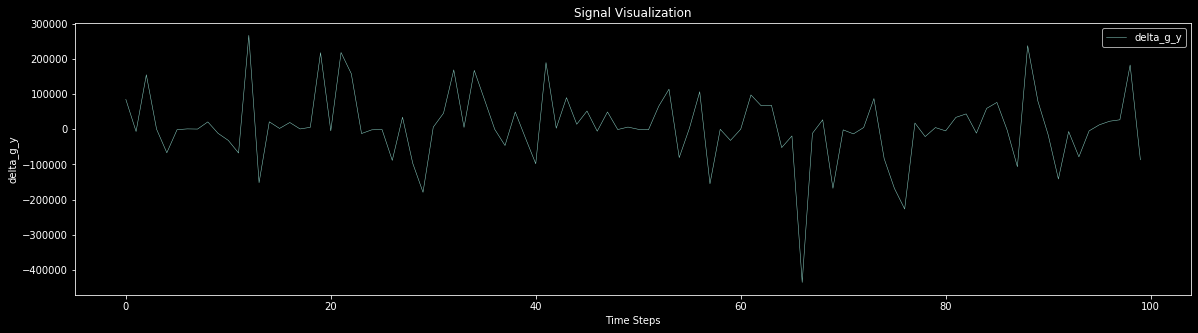

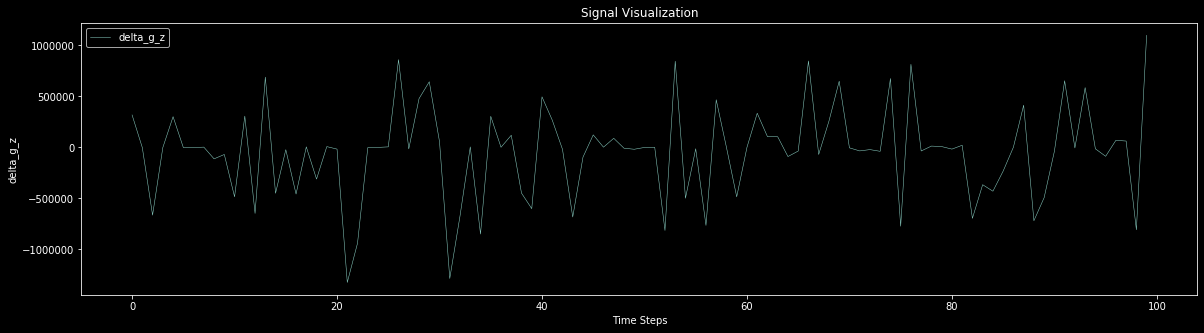

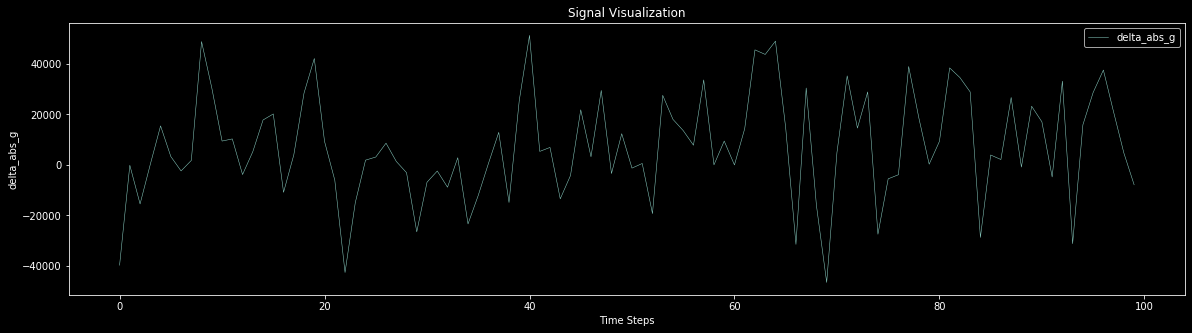

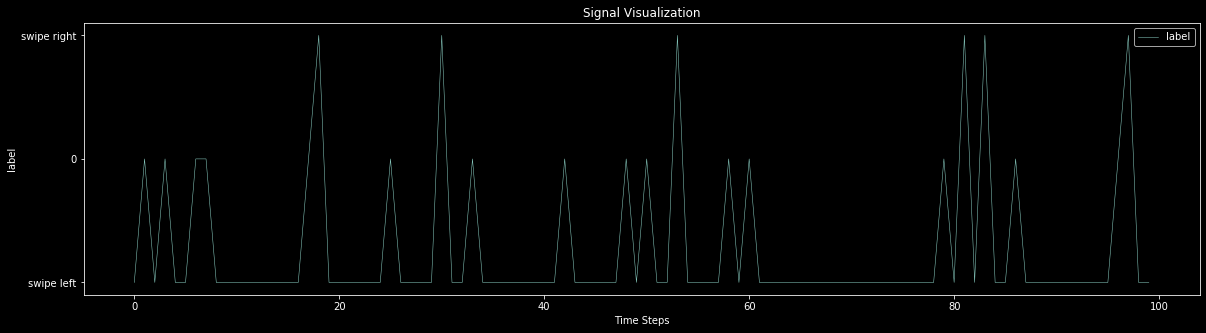

In [113]:
visualize_separetly(df.head(100))

### Time frames compression. New features extraction

In [115]:
# Describe data
df.describe()

id            r        theta          phi        acc_x  \
count  1.186000e+03  1186.000000  1186.000000  1186.000000  1186.000000   
mean   1.075889e+07  1759.993419    36.553686    -2.713100    71.586847   
std    6.812499e+06   859.316798    27.843236   119.990876  1219.285568   
min    1.000000e+00   210.192000     0.688000  -179.541000 -1998.000000   
25%    2.972500e+02  1017.823500    10.326000  -126.713250  -411.250000   
50%    1.300000e+07  1257.671500    34.265000    -1.089000   -94.000000   
75%    1.600000e+07  2656.589000    54.534000   128.712250   757.000000   
max    1.900000e+07  3460.060000   124.840000   180.000000  1998.000000   

             acc_y        acc_z        abs_a            g_x            g_y  \
count  1186.000000  1186.000000  1186.000000    1186.000000    1186.000000   
mean    380.722597  1081.442664  1753.661696   -2315.252951    5899.005059   
std     816.534095   590.126605   862.794580   79115.725588   71720.075098   
min    -765.000000 -1762.000000   210.192000 -404180.000000 -352380.000000   
25%     -95.000000   933.250000  1016.177500  -18550.000000  -15067.500000   
50%     -10.000000  1014.000000  1230.185000    -630.000000   -1995.000000   
75%     628.000000  1352.000000  2656.589000   12180.000000   21280.000000   
max    1997.000000  1998.000000  3460.060000  382760.000000  643440.000000   

       ...  delta_theta    delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
count  ...  1186.000000  1186.000000  1186.000000  1186.000000  1186.000000   
mean   ...     3.493374    13.646405    29.994941    24.630691   724.651771   
std    ...    34.653251   142.684978  1906.857835  1193.905183   873.661747   
min    ...  -115.009000  -357.533000 -3996.000000 -2668.000000 -2971.000000   
25%    ...   -11.462250   -98.539000  -867.000000  -171.000000   255.000000   
50%    ...     0.961500    -2.812500    -1.500000     5.000000  1023.500000   
75%    ...    26.206750   137.364000  1051.000000   317.000000  1152.000000   
max    ...    96.093000   358.025000  3996.000000  2604.000000  2605.000000   

       delta_abs_acc      delta_g_x      delta_g_y     delta_g_z   delta_abs_g  
count    1186.000000    1186.000000    1186.000000  1.186000e+03   1186.000000  
mean      105.036041     783.870152    1515.033727 -1.485328e+04   4557.279933  
std      1052.281499  121097.018658  104333.626298  4.946948e+05  22320.368957  
min     -2480.630000 -460180.000000 -549920.000000 -1.787660e+06 -54032.000000  
25%      -315.840500  -49910.000000  -35280.000000 -6.993000e+04  -7867.000000  
50%        10.258000    -560.000000    -420.000000 -1.470000e+03   3217.000000  
75%       425.844000   17430.000000   27002.500000  1.968400e+05  18525.000000  
max      2489.158000  618450.000000  629930.000000  2.331420e+06  58148.000000  

[8 rows x 23 columns]

In [116]:
# Get global metrix for swipe right
df.loc[df['label'] == 'swipe right'].describe()

id            r       theta         phi        acc_x  \
count  111.000000   111.000000  111.000000  111.000000   111.000000   
mean   159.405405  1851.177324   39.783315  -27.298532  -317.657658   
std     82.206655   845.792423   29.845851  126.578999  1245.113449   
min     22.000000   680.853000    2.029000 -179.341000 -1998.000000   
25%     88.500000  1058.990500    8.324500 -154.369500 -1417.500000   
50%    163.000000  1641.931000   42.477000  -48.048000  -153.000000   
75%    230.500000  2501.808000   58.433500   89.203000    59.500000   
max    293.000000  3460.060000  116.299000  179.373000  1998.000000   

             acc_y        acc_z        abs_a            g_x            g_y  \
count   111.000000   111.000000   111.000000     111.000000     111.000000   
mean    498.351351  1063.567568  1851.177324  -17353.063063   18843.243243   
std     900.305753   564.468288   845.792423  103320.084484  131843.375468   
min    -607.000000  -974.000000   680.853000 -404180.000000 -352380.000000   
25%     -85.500000   911.500000  1058.990500  -54110.000000  -12880.000000   
50%     -28.000000  1053.000000  1641.931000   -8540.000000    6650.000000   
75%    1571.000000  1317.000000  2501.808000    7840.000000   32900.000000   
max    1997.000000  1998.000000  3460.060000  253610.000000  643440.000000   

       ...  delta_theta   delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
count  ...   111.000000  111.000000   111.000000   111.000000   111.000000   
mean   ...     2.937000   11.367901    16.036036     8.171171   573.387387   
std    ...    39.206921  168.776541  1780.557195  1409.478897  1079.706123   
min    ...  -110.349000 -311.144000 -3128.000000 -2251.000000 -2971.000000   
25%    ...   -18.331500 -100.525500 -1329.500000  -474.000000  -108.000000   
50%    ...     0.991000   -9.299000  -130.000000    10.000000  1031.000000   
75%    ...    35.672500  141.401500  1033.000000   774.500000  1167.500000   
max    ...    73.882000  324.617000  3996.000000  2604.000000  2605.000000   

       delta_abs_acc      delta_g_x      delta_g_y     delta_g_z   delta_abs_g  
count     111.000000     111.000000     111.000000  1.110000e+02    111.000000  
mean       20.307054    5589.279279     950.360360 -1.544982e+04   4461.549550  
std      1164.299072  137052.237378  181778.796653  8.411441e+05  26075.175738  
min     -2382.712000 -257460.000000 -549920.000000 -1.787660e+06 -51613.000000  
25%      -900.433000  -74340.000000  -68285.000000 -4.445350e+05 -14105.500000  
50%        51.787000  -10500.000000    3920.000000  1.995000e+04   7375.000000  
75%      1015.046500   15540.000000   58345.000000  1.959650e+05  24699.000000  
max      2384.870000  432530.000000  629930.000000  2.331420e+06  51562.000000  

[8 rows x 23 columns]

In [117]:
# Get global metrix for non-swipes
df.loc[df['label'] == '0'].describe()

id            r       theta         phi        acc_x  \
count  195.000000   195.000000  195.000000  195.000000   195.000000   
mean   150.138462  1018.333323    9.955456 -120.417836  -100.410256   
std     91.894305   162.083475   13.399123   34.776644   193.520360   
min      1.000000   210.192000    0.688000 -178.319000 -1998.000000   
25%     73.500000   989.526000    4.734500 -142.548000  -123.500000   
50%    150.000000  1009.730000    6.534000 -128.598000   -68.000000   
75%    227.500000  1031.725500    9.719000 -108.528000   -26.000000   
max    306.000000  2547.279000  101.248000  100.773000   198.000000   

             acc_y        acc_z        abs_a            g_x           g_y  \
count   195.000000   195.000000   195.000000     195.000000    195.000000   
mean    -90.533333   977.317949  1018.333323   -2229.948718  -1379.897436   
std     171.937632   152.187559   162.083475   20785.190865  15342.088562   
min    -752.000000   -97.000000   210.192000 -169680.000000 -74270.000000   
25%    -113.500000   976.000000   989.526000   -3990.000000  -4830.000000   
50%     -89.000000  1002.000000  1009.730000   -1120.000000  -2730.000000   
75%     -66.000000  1020.500000  1031.725500    1540.000000    350.000000   
max    1997.000000  1535.000000  2547.279000   84490.000000  86030.000000   

       ...  delta_theta   delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
count  ...   195.000000  195.000000   195.000000   195.000000   195.000000   
mean   ...    -1.305154   -6.770549   -19.251282    -7.871795  1055.728205   
std    ...    12.033089   53.828949   228.720271   218.673223   261.076406   
min    ...   -86.886000 -283.809000 -1509.000000 -2047.000000 -2038.000000   
25%    ...    -2.033500  -20.775000   -55.500000   -21.000000  1042.000000   
50%    ...    -0.094000   -1.863000    -2.000000     0.000000  1088.000000   
75%    ...     1.404500   10.823500    35.000000    15.500000  1120.500000   
max    ...    48.305000  279.092000  1157.000000  2010.000000  1548.000000   

       delta_abs_acc      delta_g_x      delta_g_y      delta_g_z  \
count     195.000000     195.000000     195.000000     195.000000   
mean       -4.167446   -4323.487179   -1178.871795   10076.410256   
std       272.298298   38014.207777   22546.086175  107489.334390   
min     -2337.087000 -255150.000000 -142170.000000 -996660.000000   
25%       -45.280000   -4445.000000   -3465.000000   -3955.000000   
50%         1.025000    -420.000000     140.000000    2030.000000   
75%        36.801500    3745.000000    4830.000000    7980.000000   
max      1370.624000  167860.000000   87290.000000  590590.000000   

        delta_abs_g  
count    195.000000  
mean   -2522.769231  
std    14549.902931  
min   -51394.000000  
25%    -7084.500000  
50%    -1191.000000  
75%     3151.500000  
max    45287.000000  

[8 rows x 23 columns]

In [118]:
df.loc[df['label'] == 'swipe left'].describe()

id            r       theta         phi        acc_x  \
count  8.800000e+02   880.000000  880.000000  880.000000   880.000000   
mean   1.450000e+07  1912.836948   42.040239   26.470316   158.797727   
std    2.873915e+06   868.160727   26.563667  114.610478  1329.891858   
min    1.000000e+07   636.308000    1.649000 -179.541000 -1998.000000   
25%    1.200000e+07  1066.905250   18.271250  -18.397750  -487.250000   
50%    1.450000e+07  1713.126500   45.060500   21.111500  -124.500000   
75%    1.700000e+07  2827.379750   56.046000  135.014000  1856.250000   
max    1.900000e+07  3460.060000  124.840000  180.000000  1998.000000   

             acc_y        acc_z        abs_a            g_x            g_y  \
count   880.000000   880.000000   880.000000     880.000000     880.000000   
mean    470.311364  1106.770455  1904.303511    -437.340909    5879.204545   
std     855.466281   649.161051   874.282475   83516.262802   68368.590101   
min    -765.000000 -1762.000000   636.308000 -343770.000000 -307930.000000   
25%     -72.000000   909.250000  1035.838000  -26162.500000  -22225.000000   
50%      42.000000  1029.500000  1700.367500     105.000000   -1750.000000   
75%    1121.750000  1500.500000  2827.379750   19162.500000   30730.000000   
max    1997.000000  1998.000000  3460.060000  382760.000000  255640.000000   

       ...  delta_theta   delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
count  ...   880.000000  880.000000   880.000000   880.000000   880.000000   
mean   ...     4.626864   18.458018    42.668182    33.909091   670.368182   
std    ...    37.257662  152.071961  2119.646367  1289.227466   915.377416   
min    ...  -115.009000 -357.533000 -3996.000000 -2668.000000 -2275.000000   
25%    ...   -15.107750 -125.038250 -1672.500000  -318.500000     1.000000   
50%    ...     3.438500   -2.400500     0.000000     8.500000   979.000000   
75%    ...    34.493750  147.134000  2034.750000   758.250000  1186.000000   
max    ...    96.093000  358.025000  3996.000000  2388.000000  2404.000000   

       delta_abs_acc      delta_g_x      delta_g_y     delta_g_z   delta_abs_g  
count     880.000000     880.000000     880.000000  8.800000e+02    880.000000  
mean      139.921948    1309.477273    2183.204545 -2.030223e+04   6138.229545  
std      1141.049814  130732.664669  102105.686245  4.885262e+05  22939.055206  
min     -2480.630000 -460180.000000 -435050.000000 -1.590400e+06 -54032.000000  
25%      -545.944000  -63980.000000  -54442.500000 -1.132600e+05  -7920.750000  
50%        12.356500    -140.000000   -1085.000000 -5.005000e+03   5144.500000  
75%       869.698750   28297.500000   42997.500000  3.077375e+05  21551.250000  
max      2489.158000  618450.000000  319550.000000  1.213240e+06  58148.000000  

[8 rows x 23 columns]

In [121]:
# matrix feature extraction
sr_features = df.loc[df['label'] == 'swipe right'].describe()
sl_features = df.loc[df['label'] == 'swipe left'].describe()
ns_features = df.loc[df['label'] == '0'].describe()

print("sr_features.shape:", sr_features.shape)
print("sl_features.shape:", sl_features.shape)
print("ns_features.shape:", ns_features.shape)

sr_features.shape: (8, 23)
sl_features.shape: (8, 23)
ns_features.shape: (8, 23)


In [129]:
# another = max(swipe_features, nonswipe_features)
def max_dfs_merge(df1, df2):
    delta_df = df1
    for colm in df1.columns:
        for i in range(len(df1)):
            if df1[colm][i] != 0 and df2[colm][i] != 0:
                delta_val = max(abs(df1[colm][i]), abs(df2[colm][i])) / min(abs(df1[colm][i]), abs(df2[colm][i]))
            else: 
                delta_val = 0
            delta_df[colm][i] = delta_val
    return delta_df
            
delta_df_sr_ns = max_dfs_merge(sr_features, ns_features)
delta_df_sl_ns = max_dfs_merge(sl_features, ns_features)
delta_df_sr_sl = max_dfs_merge(sr_features, sl_features)

1


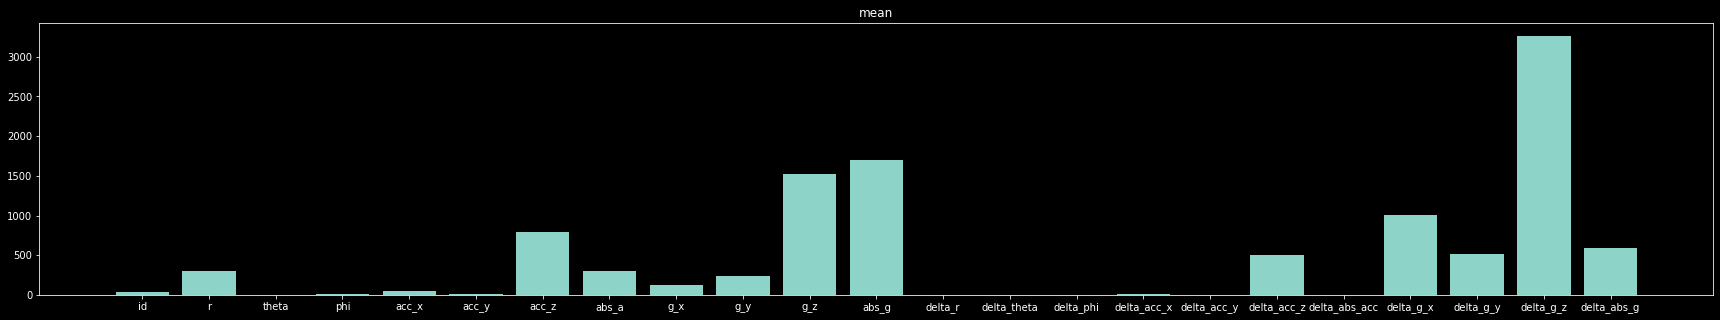

2


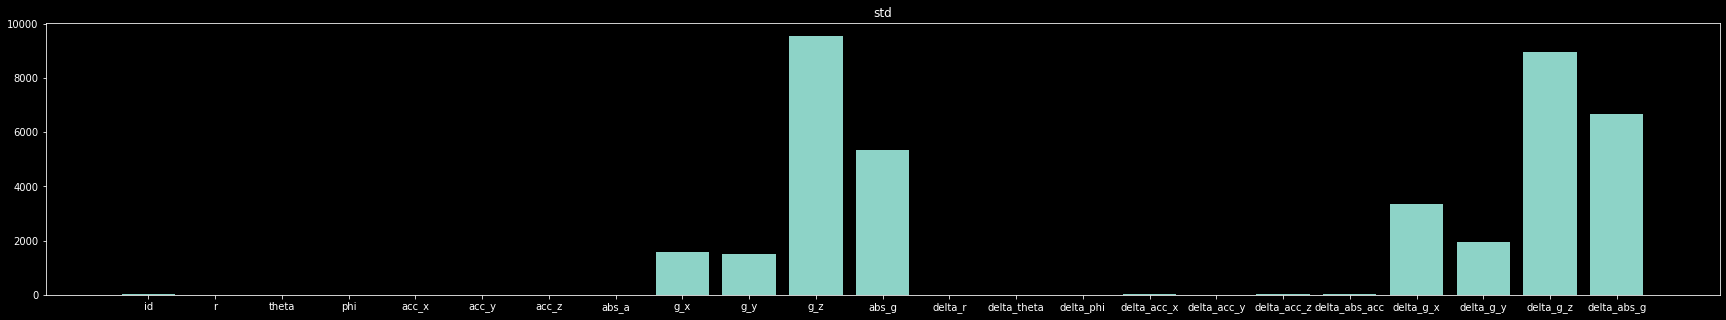

3


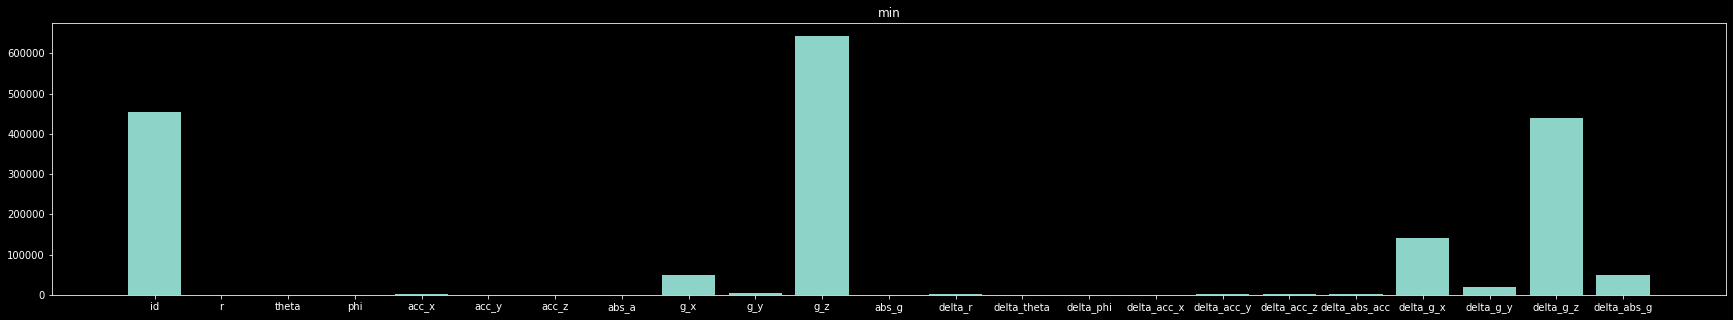

4


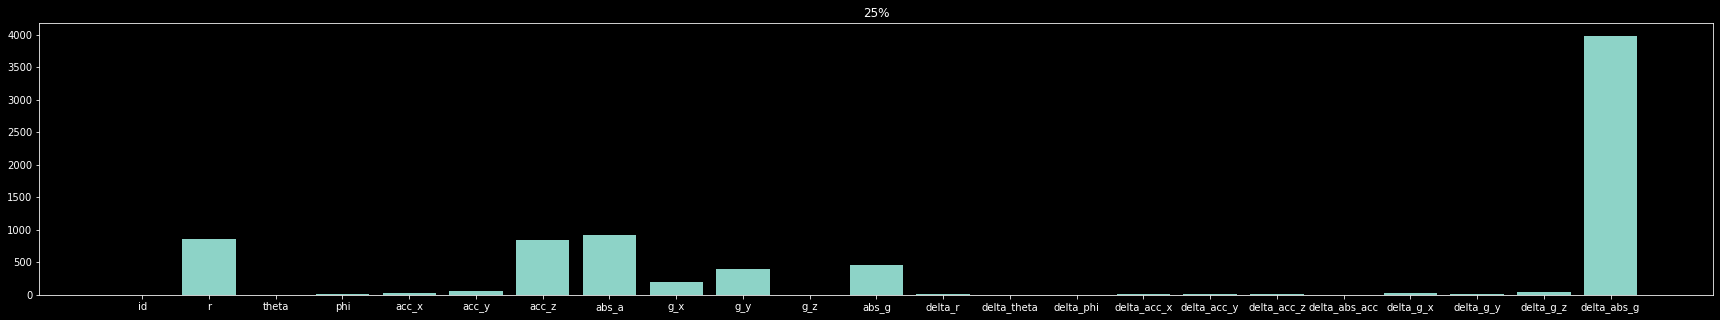

5


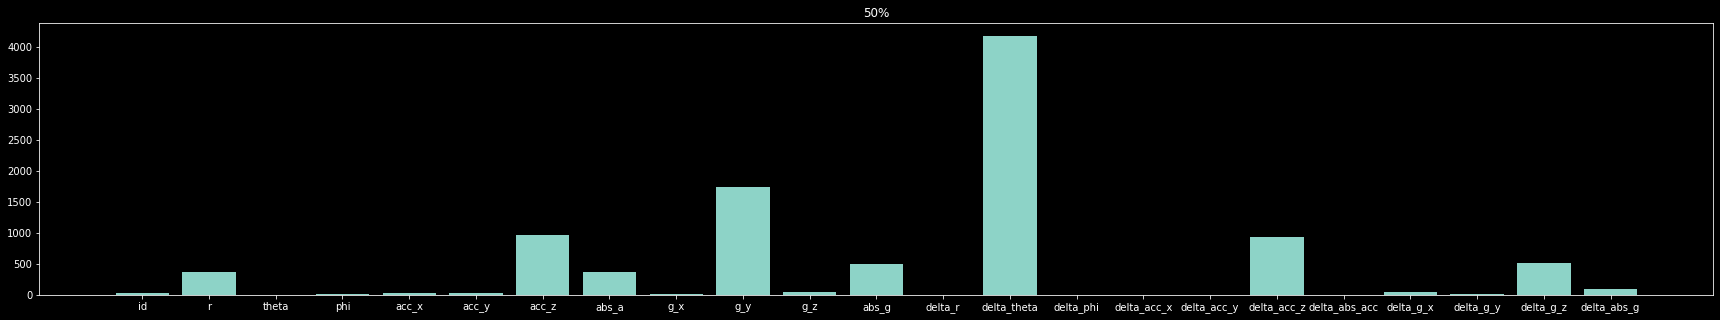

6


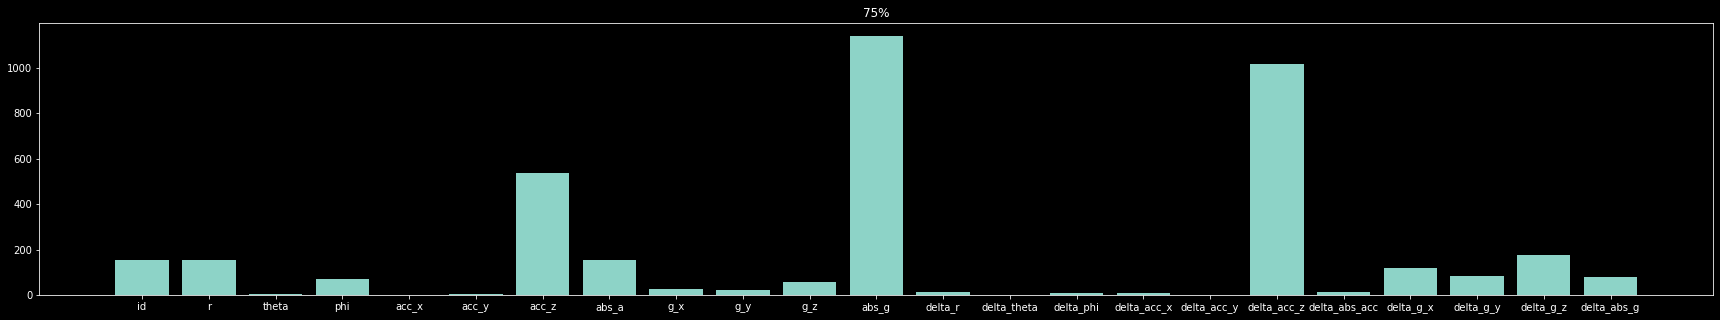

7


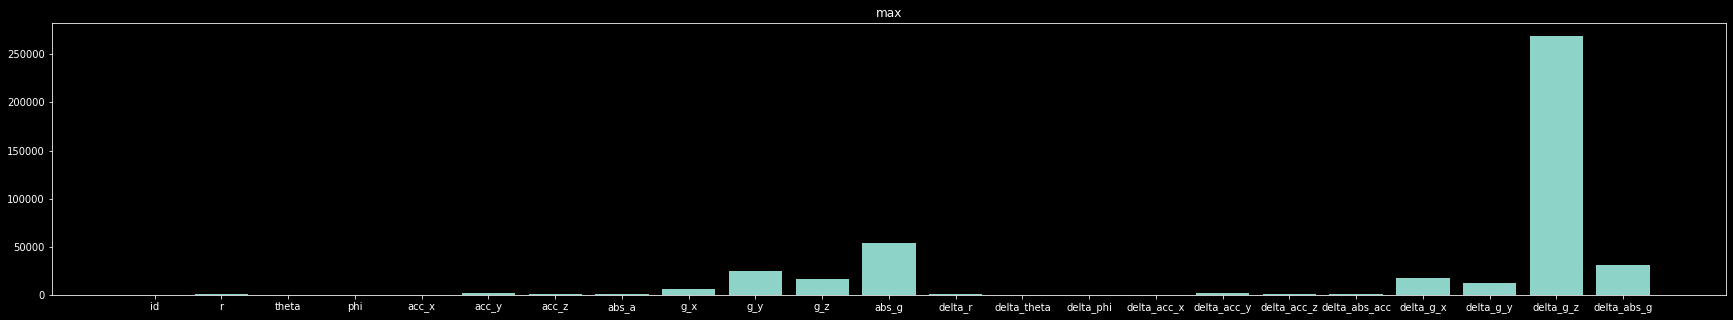

1


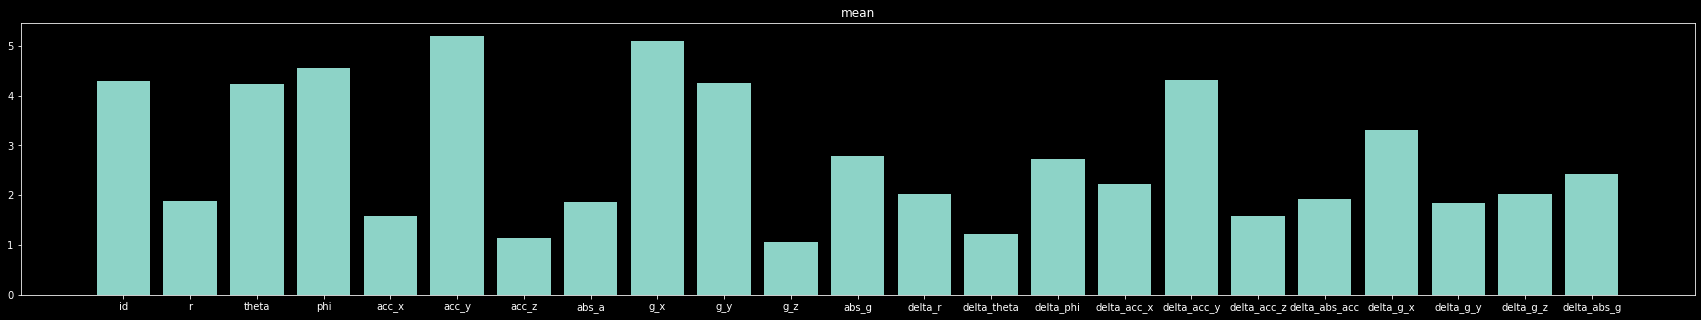

2


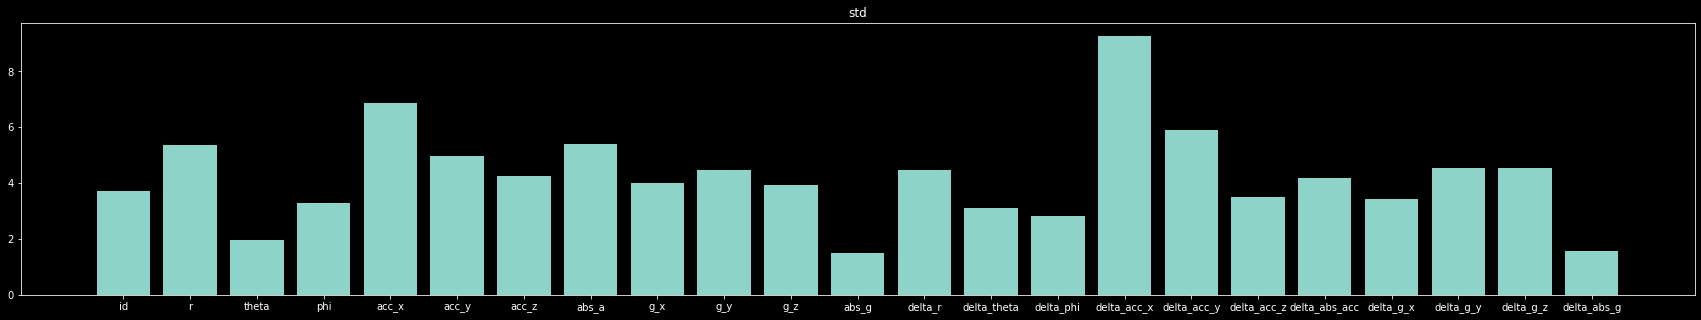

3


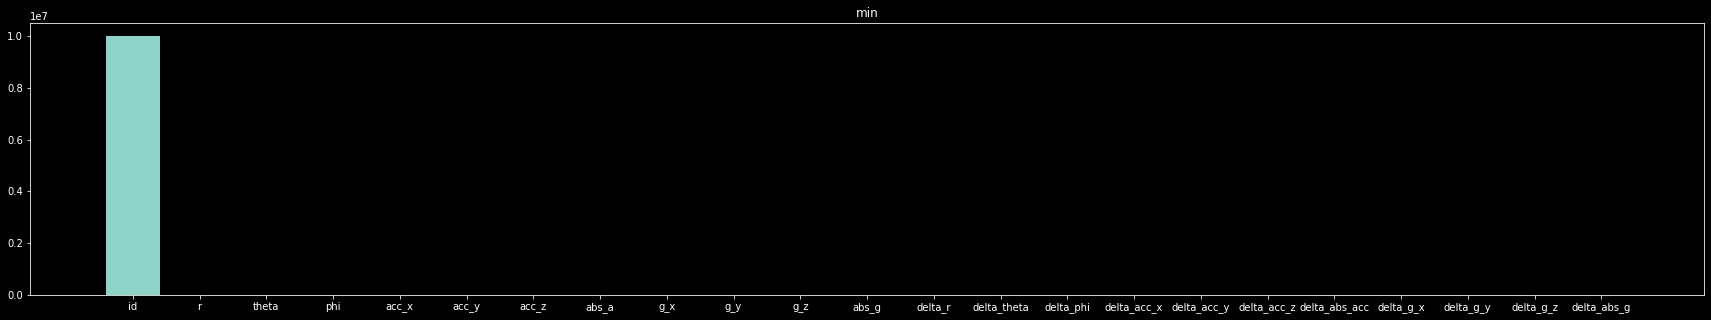

4


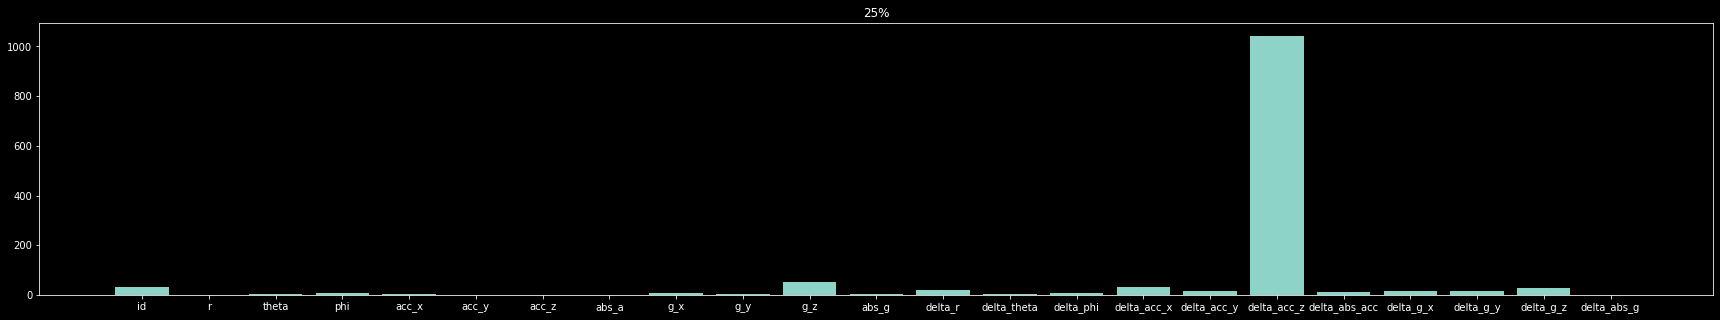

5


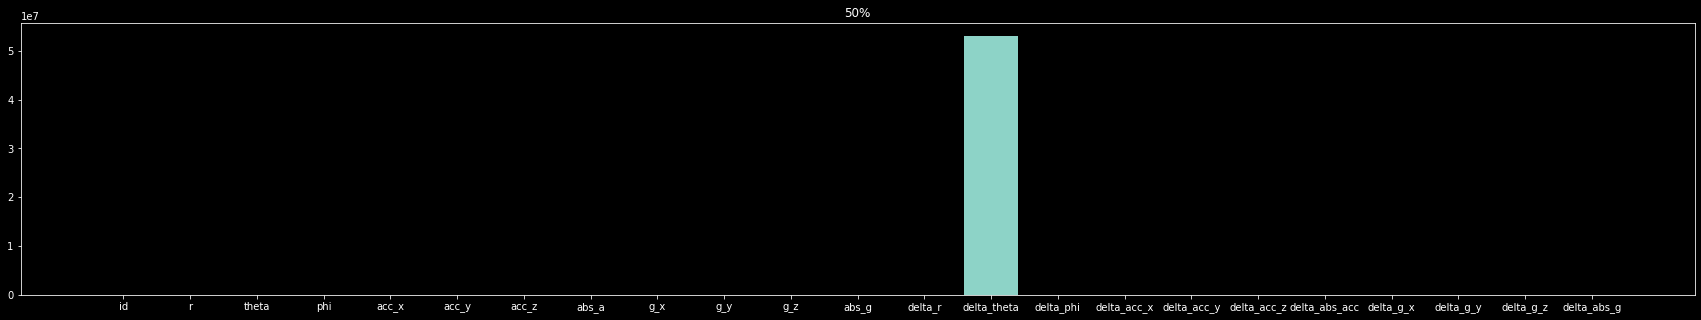

6


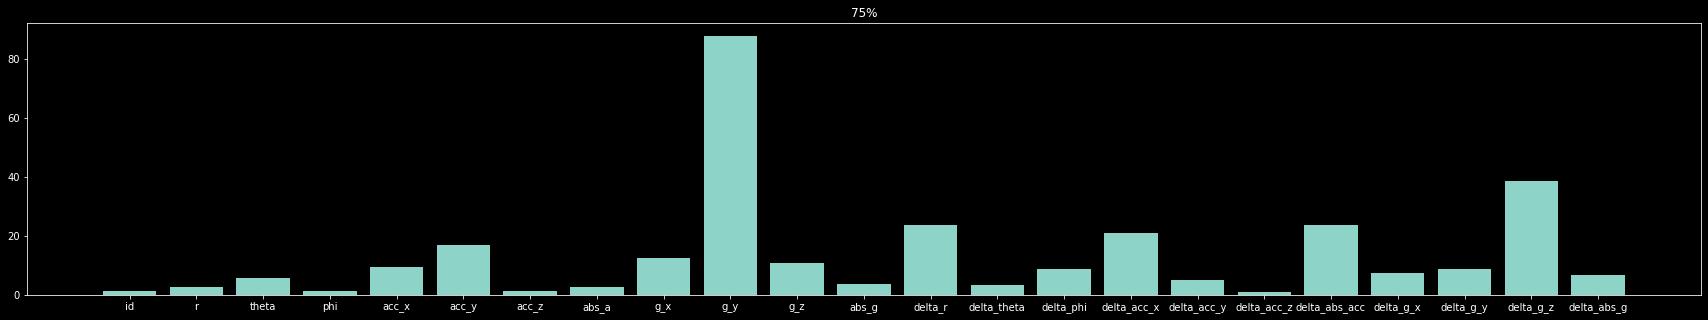

7


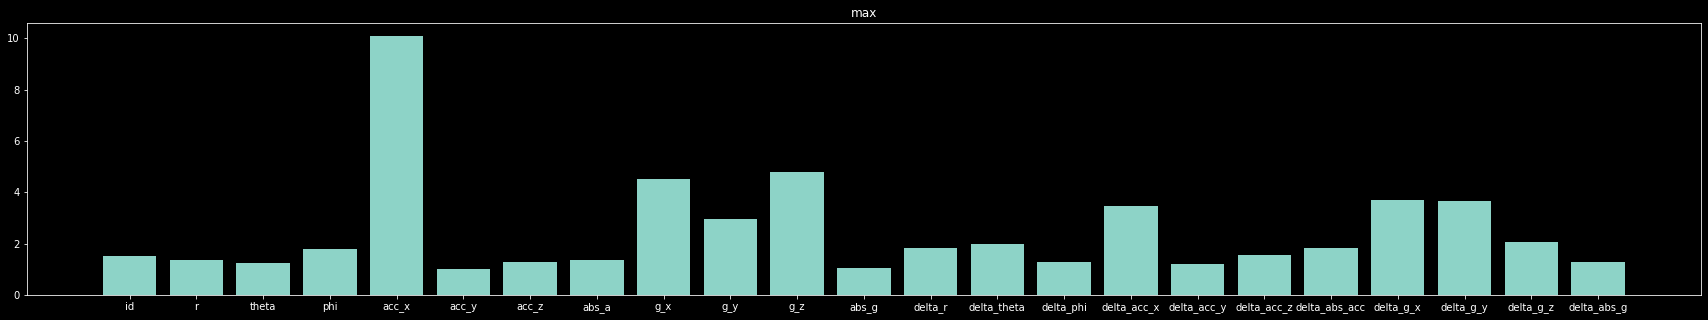

1


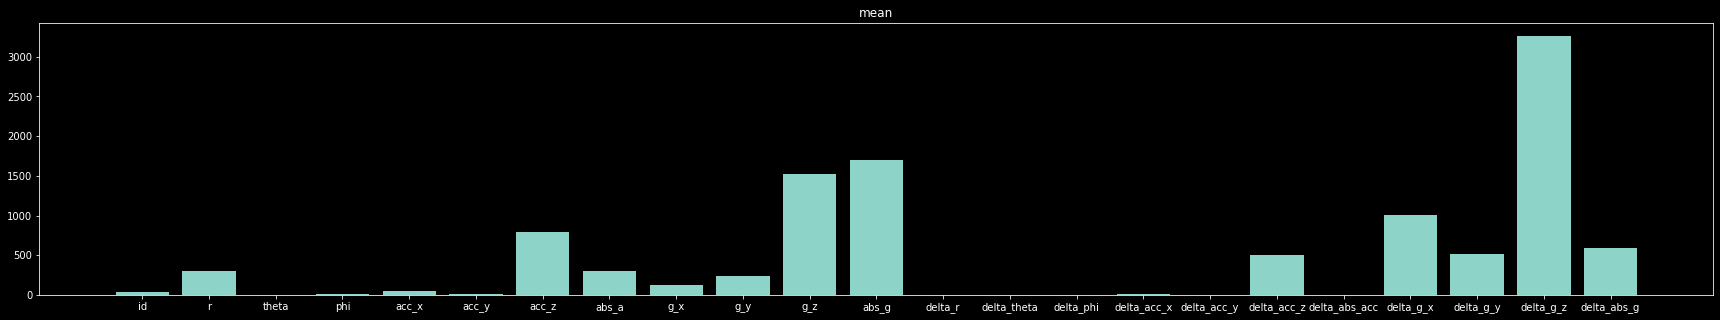

2


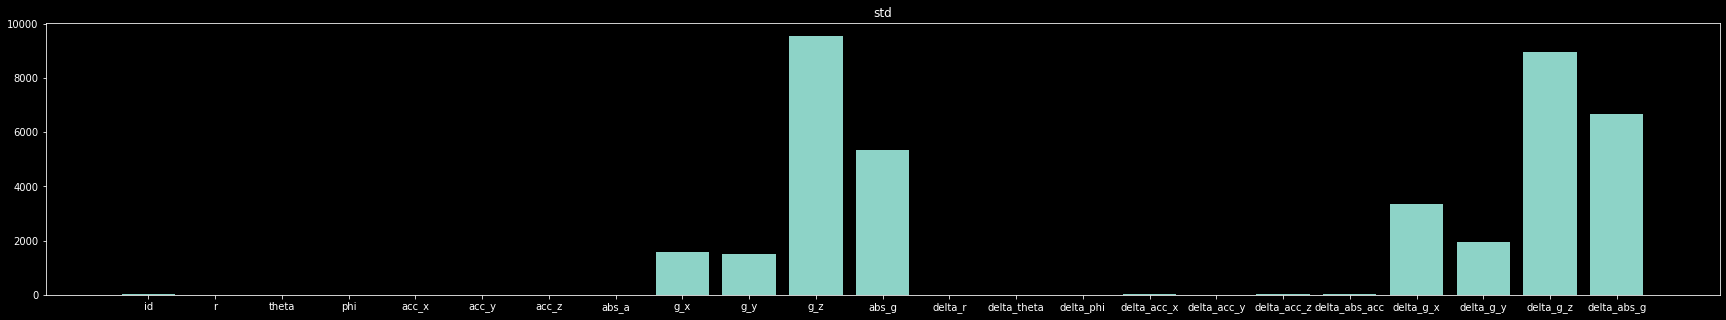

3


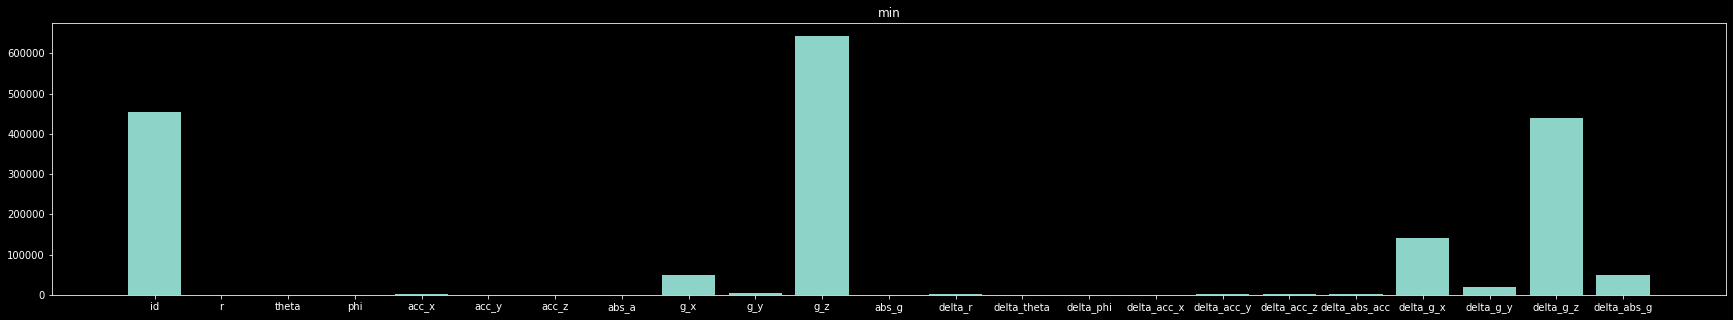

4


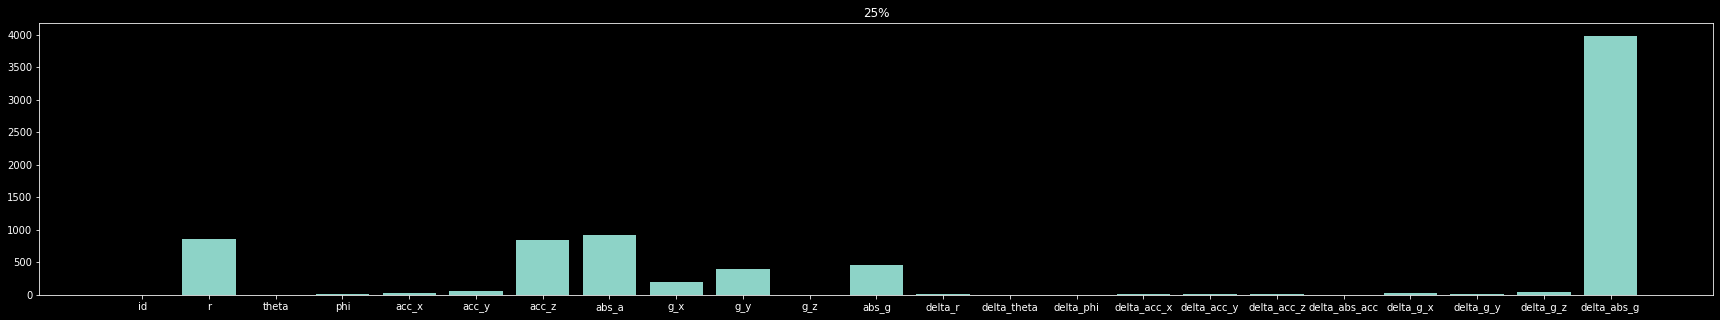

5


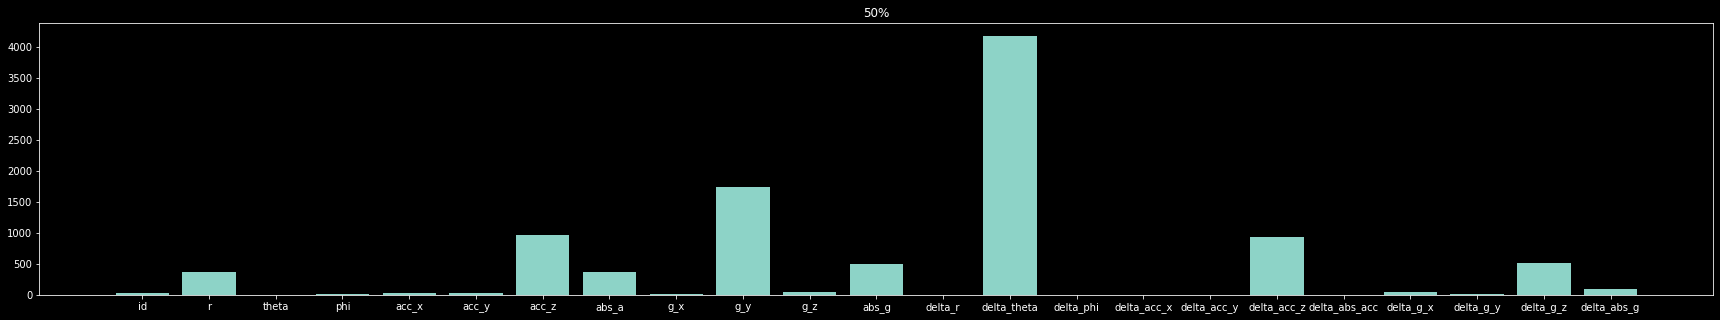

6


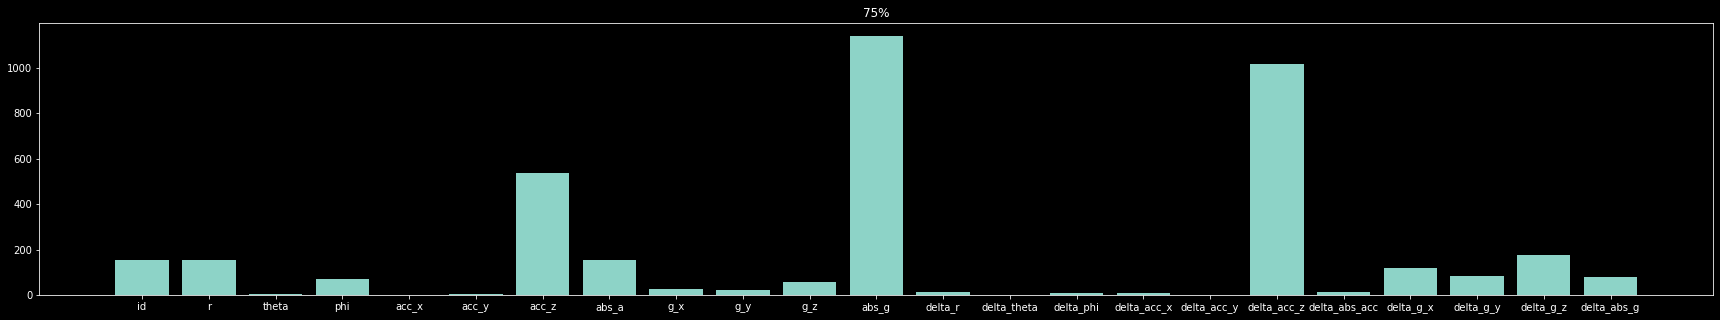

7


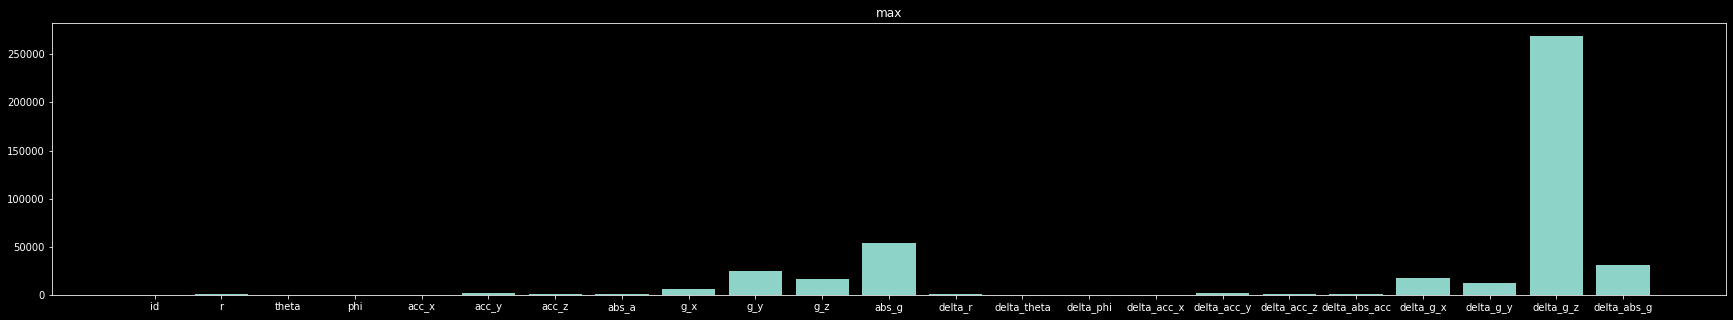

In [132]:
deltas_dfs = [delta_df_sr_ns, delta_df_sl_ns, delta_df_sr_sl]

for delta_df in deltas_dfs:
    for i in range(1, len(delta_df)):
        plt.figure(figsize=(30, 5))
        print(i)
        plt.bar(delta_df.columns, delta_df.iloc[i])
        plt.title(delta_df.index[i], color="white")
        plt.show()

In [133]:
max_vs = delta_df_sr_ns.max()
print(max_vs)

id               454545.454545
r                  1380.582252
theta                71.487419
phi                 176.096058
acc_x              1998.000000
acc_y              1997.000000
acc_z               970.850778
abs_a              1380.582252
g_x               48602.976153
g_y               24522.875754
g_z              643095.347670
abs_g             53570.399625
delta_r            2159.688398
delta_theta        4177.455318
delta_phi           205.494843
delta_acc_x         274.900478
delta_acc_y        1552.838123
delta_acc_z        1560.568832
delta_abs_acc      2159.688398
delta_g_x        140200.387290
delta_g_y         19191.365916
delta_g_z        439953.631999
delta_abs_g       48677.370956
dtype: float64


In [134]:
delta_df[['g_x', 'g_y', 'g_z']]

g_x           g_y            g_z
count     24.596591     24.596591      24.596591
mean     130.903672    243.635386    1518.274583
std     1592.698777   1489.847778    9546.946992
min    48602.976153   4944.194157  643095.347670
25%      191.936909    393.625984       1.090664
50%       13.770492   1748.349474      53.873314
75%       24.310502     20.572527      56.256869
max     6213.309829  24522.875754   16197.364011

In [12]:
df.head(30)

id         r   theta      phi  acc_x  acc_y  acc_z     abs_a     g_x  \
0    1   716.224  10.156 -100.954    -24   -124    705   716.224   52990   
1    2  1181.133   8.552 -172.146   -174    -24   1168  1181.133  -14280   
2    3   993.902   5.693  -53.246     59    -79    989   993.902   -3920   
3    4  1008.187   5.814 -108.257    -32    -97   1003  1008.187   -5040   
4    5  1309.119   3.260 -112.087    -28    -69   1307  1309.119    2450   
5    6   993.203   3.817  -93.468     -4    -66    991   993.203    3850   
6    7  1032.400   2.984  -99.637     -9    -53   1031  1032.400    8540   
7    8   964.476   3.170  -96.458     -6    -53    963   964.476   -5530   
8    9   987.044   4.501 -129.237    -49    -60    984   987.044   -1260   
9   10  1047.771   4.168 -150.068    -66    -38   1045  1047.771   12320   
10  11   999.142   3.752 -156.571    -60    -26    997   999.142    -490   
11  12  1007.659   3.288 -149.886    -50    -29   1006  1007.659   -2100   
12  13  1007.092   3.694 -151.460    -57    -31   1005  1007.092   -1820   
13  14  1008.295   3.867 -151.927    -60    -32   1006  1008.295   -3290   
14  15   994.160   3.778 -148.736    -56    -34    992   994.160   -1890   
15  16  1007.117   4.509 -152.140    -70    -37   1004  1007.117    -840   
16  17  1014.769   3.384 -146.575    -50    -33   1013  1014.769    -560   
17  18  1018.742   4.205 -152.062    -66    -35   1016  1018.742    -350   
18  19  1006.682   3.313 -151.232    -51    -28   1005  1006.682   -1330   
19  20  1018.719   5.517 -153.958    -88    -43   1014  1018.719     770   
20  21   998.858   2.375 -142.853    -33    -25    998   998.858   -1680   
21  22  1020.761   3.366 -152.152    -53    -28   1019  1020.761    3850   
22  23  2311.925  59.884 -177.535  -1998    -86   1160  2311.925  -79870   
23  24  2647.216  80.256   49.944   1679   1997    448  2647.216  144550   
24  25  1063.065   9.657  176.463   -178     11   1048  1063.065   31080   
25  26   977.888   3.561  -32.905     51    -33    976   977.888  -10430   
26  27  1021.188   2.764  -95.826     -5    -49   1020  1021.188     -70   
27  28   992.288   4.666 -138.012    -60    -54    989   992.288   -1960   
28  29   999.353   2.982  -90.000      0    -52    998   999.353   -3290   
29  30  1023.356   3.888 -126.209    -41    -56   1021  1023.356   -1120   

       g_y  ...  delta_phi  delta_acc_x  delta_acc_y  delta_acc_z  \
0    65520  ...      0.000            0            0            0   
1     1260  ...    -71.192         -150          100         1292   
2   -29820  ...    118.900          233          -55         1013   
3     7350  ...    -55.011          -91          -18         1082   
4     6790  ...     -3.830            4           28         1404   
5      350  ...     18.619           24            3         1060   
6     -630  ...     -6.169           -5           13         1097   
7      280  ...      3.179            3            0         1016   
8    -7840  ...    -32.779          -43           -7         1037   
9     5600  ...    -20.831          -17           22         1105   
10   -2100  ...     -6.503            6           12         1035   
11   -4200  ...      6.685           10           -3         1032   
12   -1820  ...     -1.574           -7           -2         1034   
13   -2520  ...     -0.467           -3           -1         1037   
14   -2940  ...      3.191            4           -2         1024   
15   -2800  ...     -3.404          -14           -3         1038   
16   -2730  ...      5.565           20            4         1050   
17   -3570  ...     -5.487          -16           -2         1049   
18   -2870  ...      0.830           15            7         1040   
19   -3990  ...     -2.726          -37          -15         1042   
20    1190  ...     11.105           55           18         1041   
21    1190  ...     -9.299          -20           -3         1044   
22 -113890  ...    -25.383        -1945          -58        

In [135]:
sr_df = df.loc[df['label'] == 'swipe right']
sl_df = df.loc[df['label'] == 'swipe left']
O_df = df.loc[df['label'] == '0']

In [136]:
def get_new_features(val_df, window=4):
    counter = 0
    mod_df = pd.DataFrame(None, columns=['mean_acc_x', 'mean_acc_y', 'mean_acc_z', 'max_acc_x', 'max_acc_y', 'max_acc_z', 'std_acc_x', 'std_acc_y', 'std_acc_z', 'min_acc_x', 'min_acc_y', 'min_acc_z', 'label']) 
    acc_x, acc_y, acc_z = [], [], []
    g_x, g_y, g_z = [], [], []

    for i in range(len(val_df)):
        counter += 1

    #   accelerometer
        acc_x.append(val_df['acc_x'].iloc[i])
        acc_y.append(val_df['acc_y'].iloc[i])
        acc_z.append(val_df['acc_z'].iloc[i])

    # #   gyroscope
    #     g_x.append(sr_df['g_x'].iloc[i])
    #     g_y.append(sr_df['g_y'].iloc[i])
    #     g_z.append(sr_df['g_z'].iloc[i])

        if counter % window == 0:
            mod_df = mod_df.append({
    #           acceleration mean
                'mean_acc_x': np.mean(acc_x),
                'mean_acc_y': np.mean(acc_y),
                'mean_acc_z': np.mean(acc_z),

    #           acceleration std
                'std_acc_x': np.std(acc_x),
                'std_acc_y': np.std(acc_y),
                'std_acc_z': np.std(acc_z),

    #           acceleration min
                'min_acc_x': min(acc_x),
                'min_acc_y': min(acc_y),
                'min_acc_z': min(acc_z),

    #           acceleration max
                'max_acc_x': max(acc_x),
                'max_acc_y': max(acc_y),
                'max_acc_z': max(acc_z),

                'label': val_df['label'].iloc[i]}, 

                ignore_index=True)

            acc_x, acc_y, acc_z = [], [], []
            counter = 0
    return mod_df
        
mod_sr_df = get_new_features(sr_df, window=4)
mod_sl_df = get_new_features(sl_df, window=4)
mod_O_df = get_new_features(O_df, window=4)

new_df = mod_sr_df.append(mod_O_df)
new_df = new_df.append(mod_sl_df)
new_df

mean_acc_x  mean_acc_y  mean_acc_z max_acc_x max_acc_y max_acc_z  \
0         -5.25      471.00      925.25      1998      1997      1476   
1       -988.00     -264.00     1178.25        29       -42      1547   
2        918.25      683.75     1277.50      1998      1997      1998   
3         75.00      460.75      914.75      1998      1997      1196   
4       -810.50       61.25      977.25        34       505       992   
..          ...         ...         ...       ...       ...       ...   
215     1319.25      581.25      774.75      1998      1997      1998   
216     1460.75      361.50     1475.75      1998      1968      1998   
217     1056.25     1365.00      625.00      1998      1997      1998   
218      642.50     -130.75     1284.00      1998       115      1998   
219      402.25      510.50      889.00      1997      1997      1024   

       std_acc_x   std_acc_y    std_acc_z min_acc_x min_acc_y min_acc_z  \
0    1414.703392  881.458167   453.796967     -1998       -70       219   
1     713.578657  210.058325   243.139235     -1973      -607       954   
2     953.335559  765.161217   491.386050      -545       157       678   
3    1322.878868  887.286136   324.082069     -1740       -88       369   
4     866.221825  261.166972    13.589978     -1998      -169       960   
..           ...         ...          ...       ...       ...       ...   
215   999.372397  837.273663   823.155324      -397      -144      -250   
216   919.028393  933.917957   354.712824      -131      -272      1000   
217   945.195053  599.067609  1174.343859        -7       707     -1110   
218   864.372749  188.446776   436.763666      -229      -401       890   
219   933.256496  859.494183   145.380535      -353       -40       644   

           label  
0    swipe right  
1    swipe right  
2    swipe right  
3    swipe right  
4    swipe right  
..           ...  
215   swipe left  
216   swipe left  
217   swipe left  
218   swipe left  
219   swipe left  

[295 rows x 13 columns]

In [137]:
new_df['label'] = new_df['label'].replace('swipe right', float(1))
new_df['label'] = new_df['label'].replace('swipe left', float(2))
new_df['label'] = new_df['label'].replace('0', float(0))

In [138]:
new_df.shape

(295, 13)

# ML Classification Algortithms

In [139]:
from sklearn import preprocessing

### Normalize values

In [140]:
x = new_df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df = pd.DataFrame(x_scaled, columns=new_df.columns)
new_df

mean_acc_x  mean_acc_y  mean_acc_z  max_acc_x  max_acc_y  max_acc_z  \
0      0.458824    0.403514    0.498139   1.000000   1.000000   0.487230   
1      0.165597    0.000000    0.619613   0.110258   0.026730   0.556974   
2      0.734373    0.520313    0.667267   1.000000   1.000000   1.000000   
3      0.482769    0.397886    0.493098   1.000000   1.000000   0.212181   
4      0.218559    0.178562    0.523106   0.112517   0.287828   0.011788   
..          ...         ...         ...        ...        ...        ...   
290    0.854021    0.464041    0.425879   1.000000   1.000000   1.000000   
291    0.896240    0.343398    0.762453   1.000000   0.986158   1.000000   
292    0.775548    0.894318    0.353979   1.000000   1.000000   1.000000   
293    0.652096    0.073154    0.670388   1.000000   0.101671   1.000000   
294    0.580412    0.425199    0.480735   0.999548   1.000000   0.043222   

     std_acc_x  std_acc_y  std_acc_z  min_acc_x  min_acc_y  min_acc_z  label  
0     0.706777   0.762877   0.306951   0.000000   0.472147   0.542740    0.5  
1     0.354171   0.179177   0.163109   0.007714   0.107337   0.744110    0.5  
2     0.474749   0.661771   0.332618   0.448318   0.626359   0.668493    0.5  
3     0.660597   0.767943   0.218379   0.079605   0.459918   0.583836    0.5  
4     0.430938   0.223609   0.006368   0.000000   0.404891   0.745753    0.5  
..         ...        ...        ...        ...        ...        ...    ...  
290   0.497901   0.724464   0.559158   0.493983   0.421875   0.414247    1.0  
291   0.457495   0.808484   0.239294   0.576057   0.334918   0.756712    1.0  
292   0.470655   0.517373   0.798957   0.614317   1.000000   0.178630    1.0  
293   0.430008   0.160388   0.295320   0.545819   0.247283   0.726575    1.0  
294   0.464651   0.743782   0.096357   0.507559   0.492527   0.659178    1.0  

[295 rows x 13 columns]

In [141]:
new_df['label'] = new_df['label'].astype('category')
new_df['label'] = new_df['label'].cat.codes
new_df.dtypes

mean_acc_x    float64
mean_acc_y    float64
mean_acc_z    float64
max_acc_x     float64
max_acc_y     float64
max_acc_z     float64
std_acc_x     float64
std_acc_y     float64
std_acc_z     float64
min_acc_x     float64
min_acc_y     float64
min_acc_z     float64
label            int8
dtype: object

In [142]:
from numpy import where
from collections import Counter

# ML libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

features = new_df[['mean_acc_x', 'mean_acc_y', 'mean_acc_z', 'max_acc_x', 'max_acc_y', 'max_acc_z', 'std_acc_x', 'std_acc_y', 'std_acc_z',	'min_acc_x', 'min_acc_y', 'min_acc_z']]
labels = new_df['label']

# convert into nupmy for speed
np_features = features.to_numpy()
np_labels = labels.to_numpy()

In [143]:
np_features

array([[0.45882441, 0.40351359, 0.49813948, ..., 0.        , 0.47214674,
        0.54273973],
       [0.16559749, 0.        , 0.61961349, ..., 0.00771367, 0.10733696,
        0.74410959],
       [0.73437267, 0.52031293, 0.66726683, ..., 0.44831842, 0.6263587 ,
        0.66849315],
       ...,
       [0.77554826, 0.89431787, 0.35397911, ..., 0.61431657, 1.        ,
        0.17863014],
       [0.65209608, 0.07315399, 0.67038771, ..., 0.54581919, 0.24728261,
        0.72657534],
       [0.58041176, 0.42519901, 0.48073461, ..., 0.5075594 , 0.49252717,
        0.65917808]])

(295, 12) (295,)


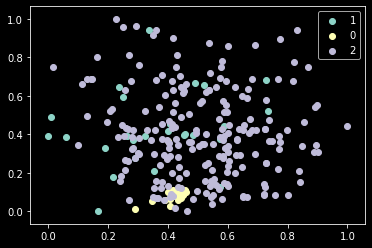

In [181]:
# summarize dataset shape
print(np_features.shape, np_labels.shape)

# summarize observations by class label
counter = Counter(np_labels)
# print(counter)

# summarize first few examples
for i in range(10):
# 	print(np_features[i], np_labels[i])
    pass
    
# plot the dataset and color the by class label
for label, _ in counter.items():
    row_ix = where(labels == label)[0]
    plt.scatter(np_features[row_ix, 0], np_features[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

# Random Forest Model

In [188]:
import joblib

# create models
rf_model = RandomForestClassifier()

# split data into training and testing 80/20 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3)

# fit model
rf_model.fit(features_train, labels_train)

# run prediction
print("Model Prediction Accuracty:", rf_model.score(features_test, labels_test))

Model Prediction Accuracty: 0.8876404494382022


In [ ]:
# Save model to file
model.save('model')
print(f"Model saved to {filename}.")

filename = 'rf_model.sav'
joblib.dump(rf_model, filename)

# Conclusion

##### With the less features selected based on change unit  Random Forest model perform significantly better than all other models.  